# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



* Data
* Variable	Definition
* User_ID	User ID
* Product_ID	Product ID
* Gender	Sex of User
* Age	Age in bins
* Occupation	Occupation (Masked)
* City_Category	Category of the City (A,B,C)
* Stay_In_Current_City_Years	Number of years stay in current city
* Marital_Status	Marital Status
* Product_Category_1	Product Category (Masked)
* Product_Category_2	Product may belongs to other category also (Masked)
* Product_Category_3	Product may belongs to other category also (Masked)
* Purchase	Purchase Amount (Target Variable)

## 1. Data Collection
## 2. Data pre-processing
## 3. Missing Value Filling by Different Technique
## 4. Handeling Categorical Value from Data Set
## 5. Visualization
## 6. Split Data for Training Model
## 7. Model Selection
## 8. Accuracy , Cross-Validation 

## Project

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Collection

### Loading train dataset

In [2]:
df = pd.read_csv('blackFriday_train.csv')

print(df.shape)
df.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Loading test dataset

In [3]:
df2 = pd.read_csv('blackFriday_test.csv')
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


## 2. Data pre-processing

## Checking the number of rows and columns in the test dataset

In [4]:
print(df2.shape) 

(233599, 11)


In [5]:
df.shape

(550068, 12)

## Visualizing First 5 Rows of the Dataset.


In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


### Describing the basic statistics of the data.

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Dropping unnecessary fields from the dataset.


In [9]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [10]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [11]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Visualizing the unique values of the particular field.

In [13]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [14]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [16]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
df.Marital_Status.unique()

array([0, 1], dtype=int64)

In [19]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [20]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df.Purchase.unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

# Handeling Categorical Columns

### Converting categorical data into integer ones by using mapping function.

In [22]:
df['Gender']=df['Gender'].map({'F':0, 'M':1})

In [23]:
df['Gender'].head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

In [24]:
df.Gender.unique()

array([0, 1], dtype=int64)

### Mapping the range variable into integer ones.

In [25]:
df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })

In [26]:
df.Age.unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [27]:
df.head() # checking the dataset after transformation

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370
1,0,1,10,A,2,0,1,6.0,14.0,15200
2,0,1,10,A,2,0,12,NaN,NaN,1422
3,0,1,10,A,2,0,12,14.0,NaN,1057
4,1,7,16,C,4+,0,8,NaN,NaN,7969


 ## Checking the uniquce values in the City_Category column

In [28]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

## Creating dummies for the categorical data.

In [30]:
city = pd.get_dummies(df['City_Category'],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


### Concatinaing dummy variables with original dataset.

In [31]:
df = pd.concat([df,city],axis=1)
df.head() # checking the dataset after transformation

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,1,7,16,C,4+,0,8,NaN,NaN,7969,0,1


In [32]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [33]:
df.tail()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550063,1,6,13,B,1,1,20,NaN,NaN,368,1,0
550064,0,3,1,C,3,0,20,NaN,NaN,371,0,1
550065,0,3,15,B,4+,1,20,NaN,NaN,137,1,0
550066,0,7,1,C,2,0,20,NaN,NaN,365,0,1
550067,0,5,0,B,4+,1,20,NaN,NaN,490,1,0


### Converting categorical data into integer ones by using mapping function.

In [34]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'2':2, '4+':4,'3':3, '1':1, '0':0 })

In [35]:
df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0], dtype=int64)

In [36]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,1,7,16,C,4,0,8,NaN,NaN,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,B,1,1,20,NaN,NaN,368,1,0
550064,0,3,1,C,3,0,20,NaN,NaN,371,0,1
550065,0,3,15,B,4,1,20,NaN,NaN,137,1,0
550066,0,7,1,C,2,0,20,NaN,NaN,365,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int64(7), object(1), uint8(2)
memory usage: 43.0+ MB


# Handeling Missing Value for Different Techniques

### Checking for columnwise Null values 

In [38]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

### Visualizing unique values of fields which contains NAN values for different columns.

In [39]:
df.Product_Category_1.unique()  

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [40]:
df.Product_Category_2.unique()  

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [41]:
df.Product_Category_3.unique()  

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Value count of each variable.

In [42]:
df.Product_Category_1.value_counts()  

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [43]:
df.Product_Category_2.value_counts()  

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [44]:
df.Purchase.value_counts()  

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
9004       1
18376      1
4721       1
21282      1
23896      1
Name: Purchase, Length: 18105, dtype: int64

### Finding mode of the field.

In [45]:
df.Product_Category_1.mode()  

0    5
dtype: int64

### Renaming the columns.

In [46]:
df.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2', 'Product_Category_3':'cat3'},inplace=True)

In [47]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,1,7,16,C,4,0,8,NaN,NaN,7969,0,1


### Looking at the column names after the rename operation.

In [48]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

### Filling the NAN values with the mode.

In [49]:
df['cat2'] = df['cat2'].fillna(df['cat2'].mode()[0])

In [50]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                          383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [51]:
df.head() # checking the dataset after transformation

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,A,2,0,3,8.0,NaN,8370,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,A,2,0,12,8.0,NaN,1422,0,0
3,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,1,7,16,C,4,0,8,8.0,NaN,7969,0,1


In [52]:
df.cat2.mode() # checking the mode after transformation

0    8.0
dtype: float64

In [53]:
df['cat3'] = df['cat3'].fillna(df['cat3'].mode()[0])

In [54]:
df.isnull().sum() # checking the dataframe again for null values. cat1, cat2 and cat3 no more have null values

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

## Filling the nan values with the mean of the column.

In [55]:
df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mean())

In [56]:
df.head() # looking at the datset after filling the null value

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,C,4,0,8,8.0,16.0,7969,0,1


## Rechecking the null values.

In [57]:
df.isnull().sum() # All the null values have been removed

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

### Dropping the Column.

In [58]:
df.drop('City_Category',axis=1, inplace=True) 

In [59]:
df.head() # checking the dataset after transformation

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1


In [60]:
df.Stay_In_Current_City_Years.unique() # checking the unique values in the column Stay_In_Current_City_Years

array([2, 4, 3, 1, 0], dtype=int64)

### Checking the allover info of the dataset.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int64  
 4   Marital_Status              550068 non-null  int64  
 5   cat1                        550068 non-null  int64  
 6   cat2                        550068 non-null  float64
 7   cat3                        550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  uint8  
 10  C                           550068 non-null  uint8  
dtypes: float64(2), int64(7), uint8(2)
memory usage: 38.8 MB


### Converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above

In [62]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

### Rechecking the datatypes of the dataset.

In [63]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                        int64
B                               int32
C                               int32
dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int64  
 4   Marital_Status              550068 non-null  int64  
 5   cat1                        550068 non-null  int64  
 6   cat2                        550068 non-null  float64
 7   cat3                        550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  int32  
 10  C                           550068 non-null  int32  
dtypes: float64(2), int32(2), int64(7)
memory usage: 42.0 MB


## Creating a checkpoint.

In [65]:
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,368,1,0
550064,0,3,1,3,0,20,8.0,16.0,371,0,1
550065,0,3,15,4,1,20,8.0,16.0,137,1,0
550066,0,7,1,2,0,20,8.0,16.0,365,0,1


In [66]:
df_i = df.copy()

In [67]:
df_i.head(10)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1
5,1,3,15,3,0,1,2.0,16.0,15227,0,0
6,1,5,7,2,1,1,8.0,17.0,19215,1,0
7,1,5,7,2,1,1,15.0,16.0,15854,1,0
8,1,5,7,2,1,1,16.0,16.0,15686,1,0
9,1,3,20,1,1,8,8.0,16.0,7871,0,0


In [68]:
df_i.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

In [69]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int64  
 4   Marital_Status              550068 non-null  int64  
 5   cat1                        550068 non-null  int64  
 6   cat2                        550068 non-null  float64
 7   cat3                        550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  int32  
 10  C                           550068 non-null  int32  
dtypes: float64(2), int32(2), int64(7)
memory usage: 42.0 MB


In [70]:
df_i.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,550068.0,0.753105,0.431205,0.0,1.0,1.0,1.0,1.0
Age,550068.0,3.496430,1.353632,1.0,3.0,3.0,4.0,7.0
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Stay_In_Current_City_Years,550068.0,1.858418,1.289443,0.0,1.0,2.0,3.0,4.0
Marital_Status,550068.0,0.409653,0.491770,0.0,0.0,0.0,1.0,1.0
cat1,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
cat2,550068.0,9.260768,4.294093,2.0,8.0,8.0,14.0,18.0
cat3,550068.0,14.989567,2.739846,3.0,16.0,16.0,16.0,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0
B,550068.0,0.420263,0.493601,0.0,0.0,0.0,1.0,1.0


# 5. Visualization

### 1. Visualizing Age Vs Purchased.

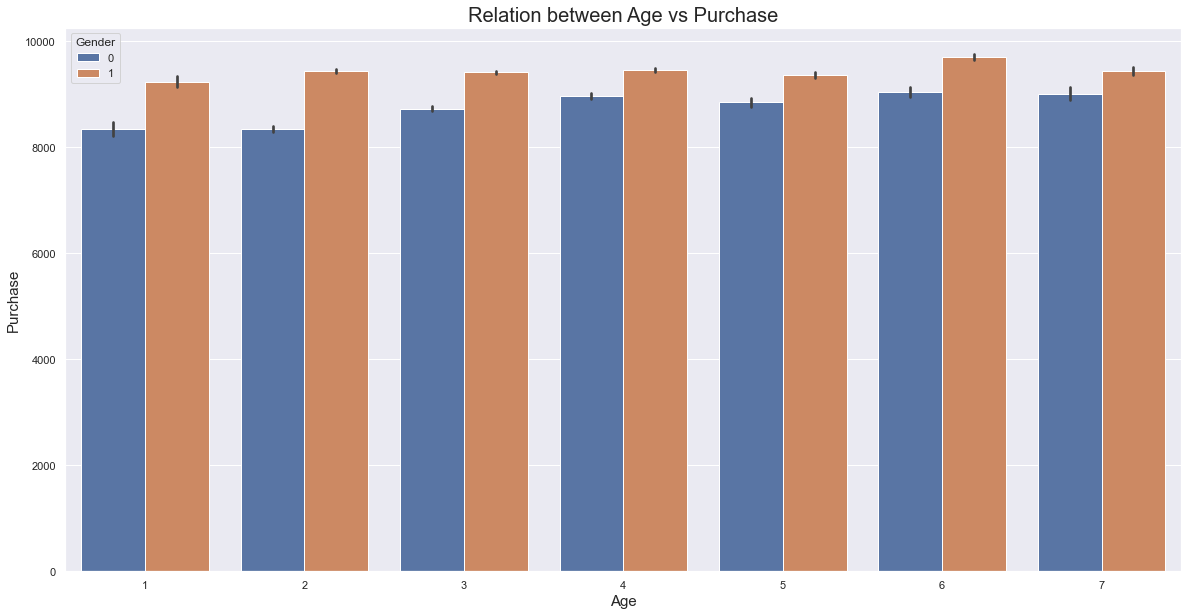

In [71]:
sns.set(rc ={'figure.figsize':(20,10)})
sns.barplot('Age','Purchase',hue='Gender',data=df_i)
plt.title('Relation between Age vs Purchase',fontsize = 20)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Purchase',fontsize = 15)
plt.show()

### 2. Visualizing Occupation Vs Purchased.

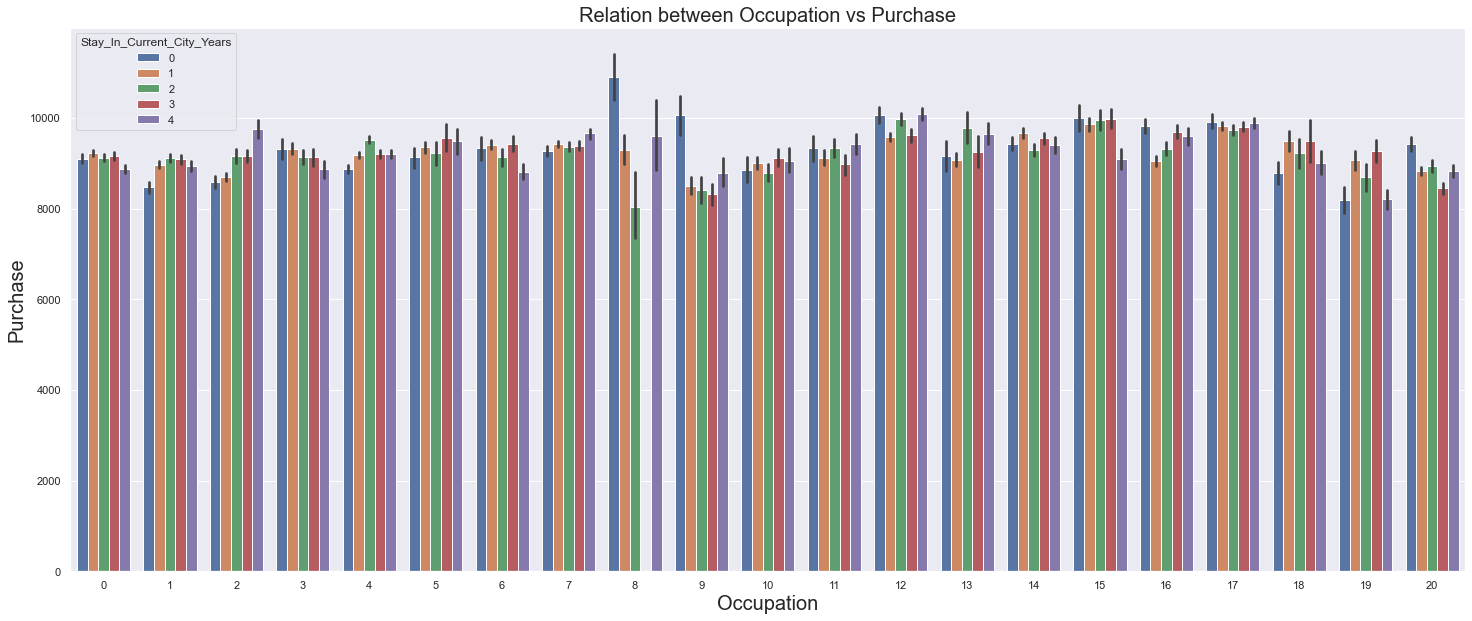

In [72]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df_i)
plt.title('Relation between Occupation vs Purchase',fontsize = 20)
plt.xlabel('Occupation',fontsize = 20)
plt.ylabel('Purchase',fontsize = 20)
plt.show()

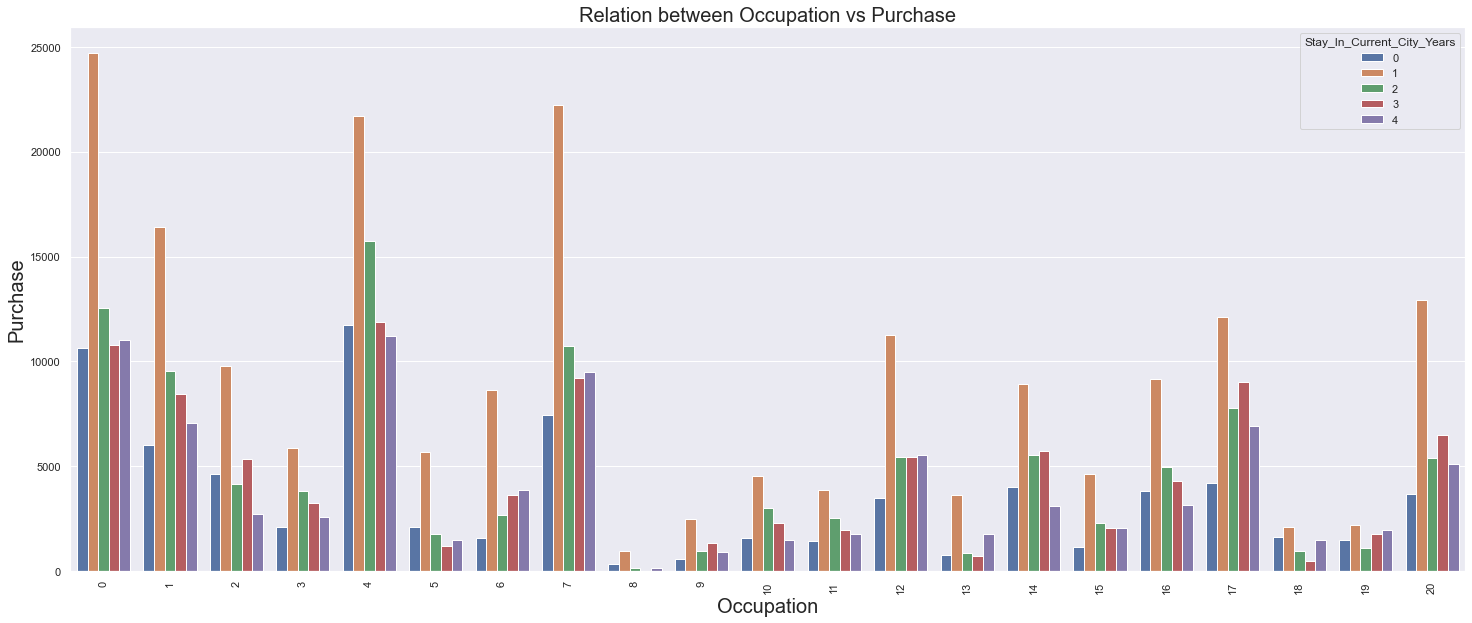

In [73]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.countplot('Occupation',hue='Stay_In_Current_City_Years',data=df_i)
plt.title('Relation between Occupation vs Purchase',fontsize = 20)
plt.xticks(rotation=90)
plt.xlabel('Occupation',fontsize = 20)
plt.ylabel('Purchase',fontsize = 20)
plt.show()

In [74]:
df_i.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'cat1', 'cat2', 'cat3', 'Purchase', 'B', 'C'],
      dtype='object')

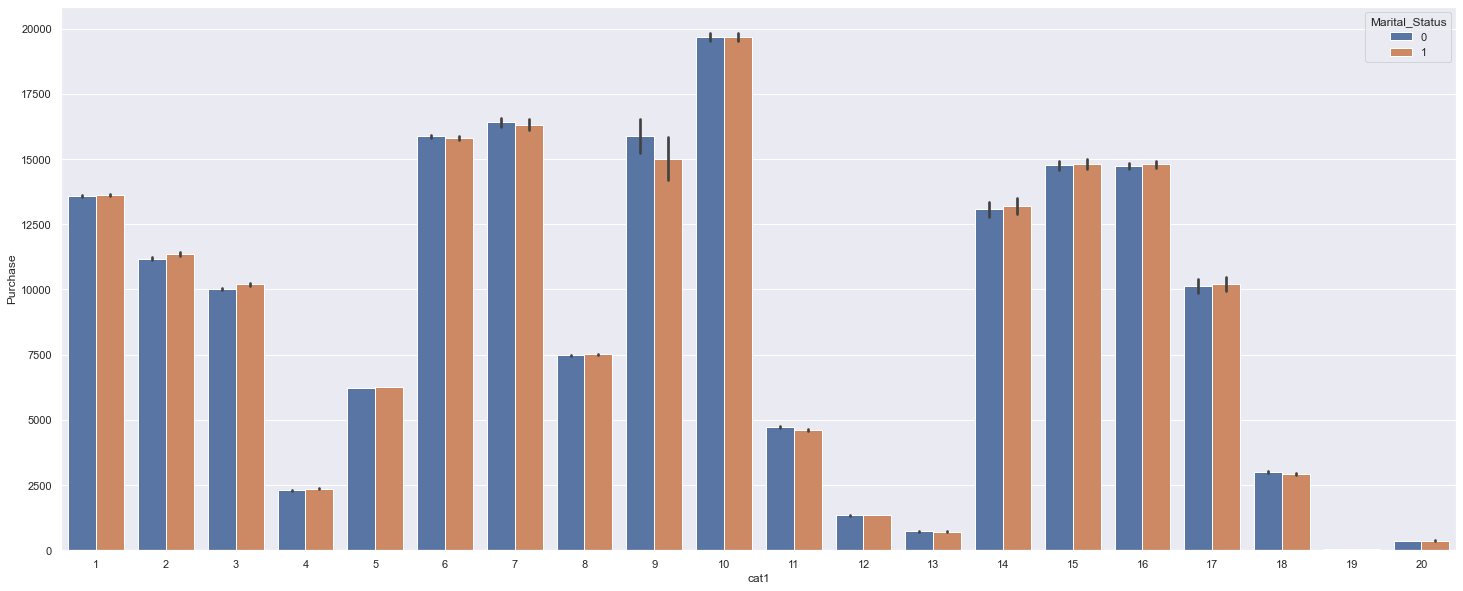

In [75]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.barplot('cat1','Purchase',hue='Marital_Status',data=df_i)
plt.show()

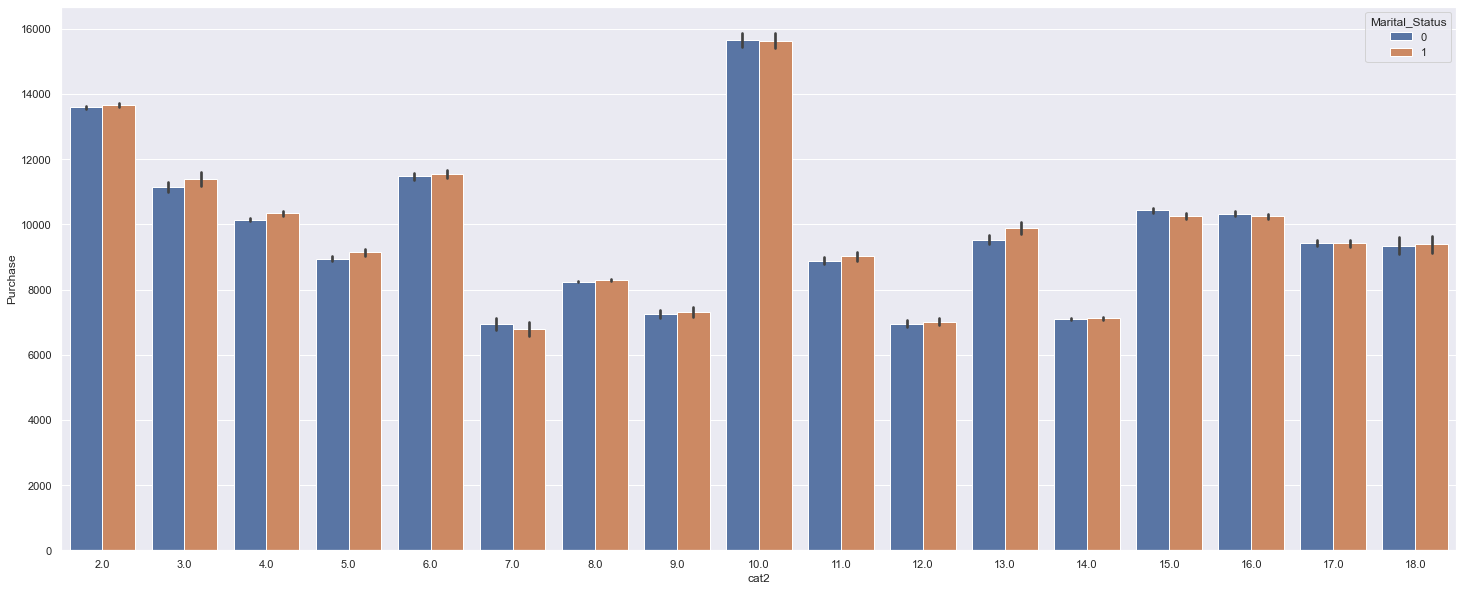

In [76]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.barplot('cat2','Purchase',hue='Marital_Status',data=df_i)
plt.show()

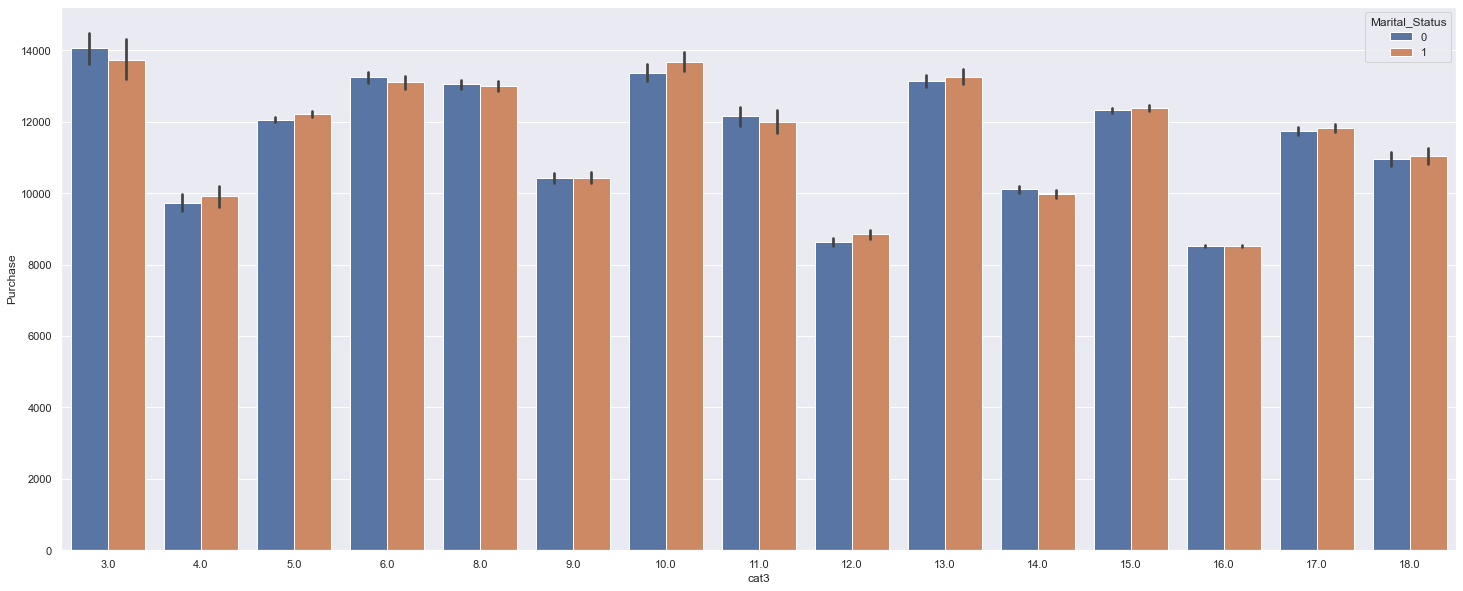

In [77]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.barplot('cat3','Purchase',hue='Marital_Status',data=df_i)
plt.show()

In [78]:
df_i.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'cat1', 'cat2', 'cat3', 'Purchase', 'B', 'C'],
      dtype='object')

In [ ]:
sns.pairplot(df_i,hue='Occupation')

In [ ]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.pairplot(df_i,hue='Marital_Status')

In [ ]:
sns.pairplot(df_i,hue='Gender')

In [ ]:
df_i.columns

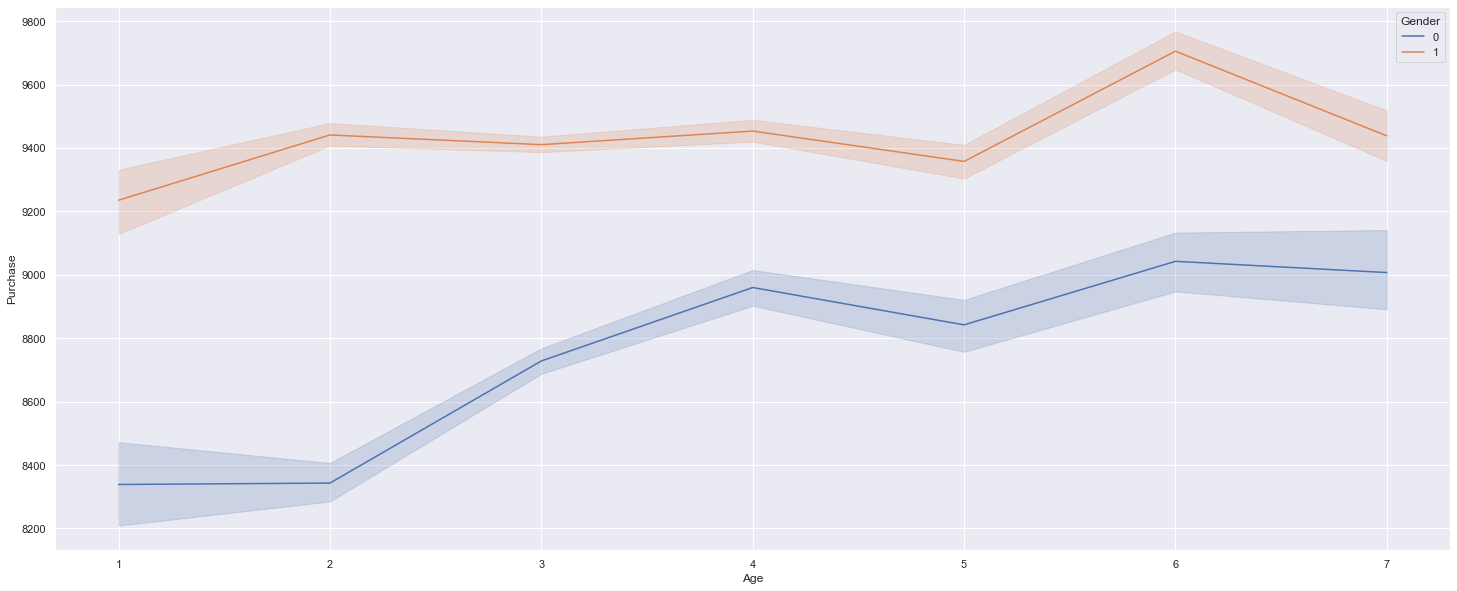

In [79]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.lineplot(x='Age',y='Purchase',data=df_i,hue='Gender')
plt.show()

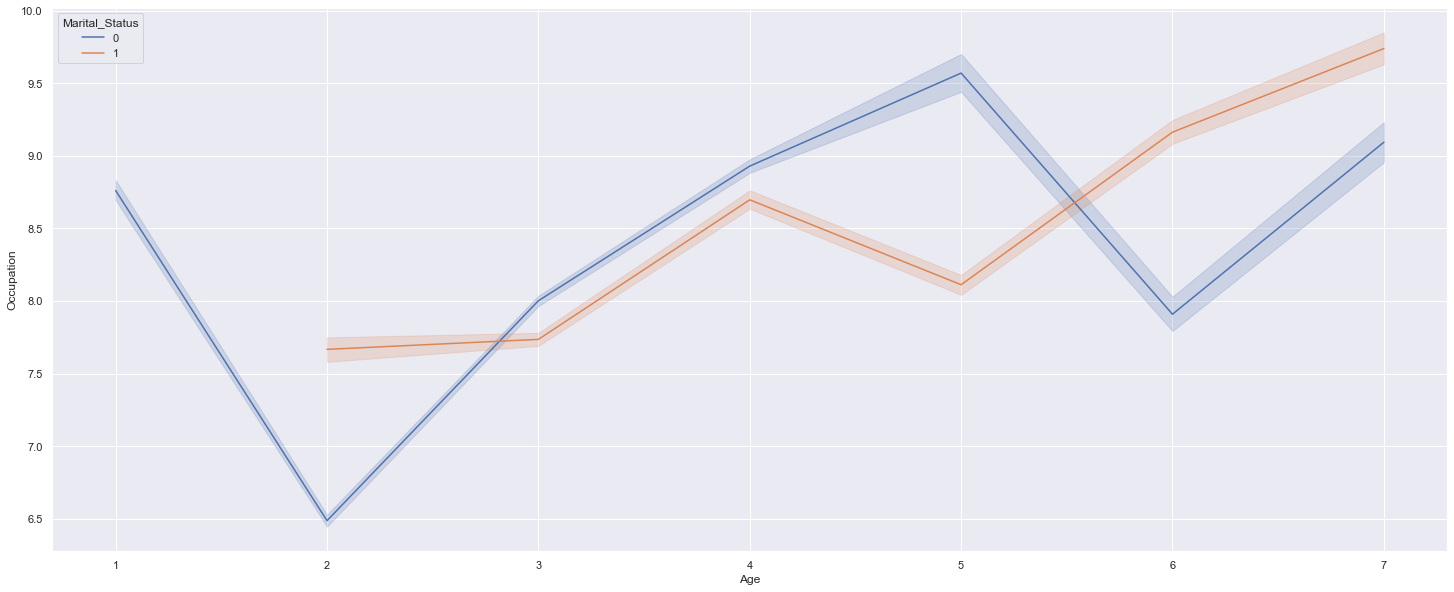

In [80]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.lineplot(x='Age',y='Occupation',data=df_i,hue = 'Marital_Status')
plt.show()

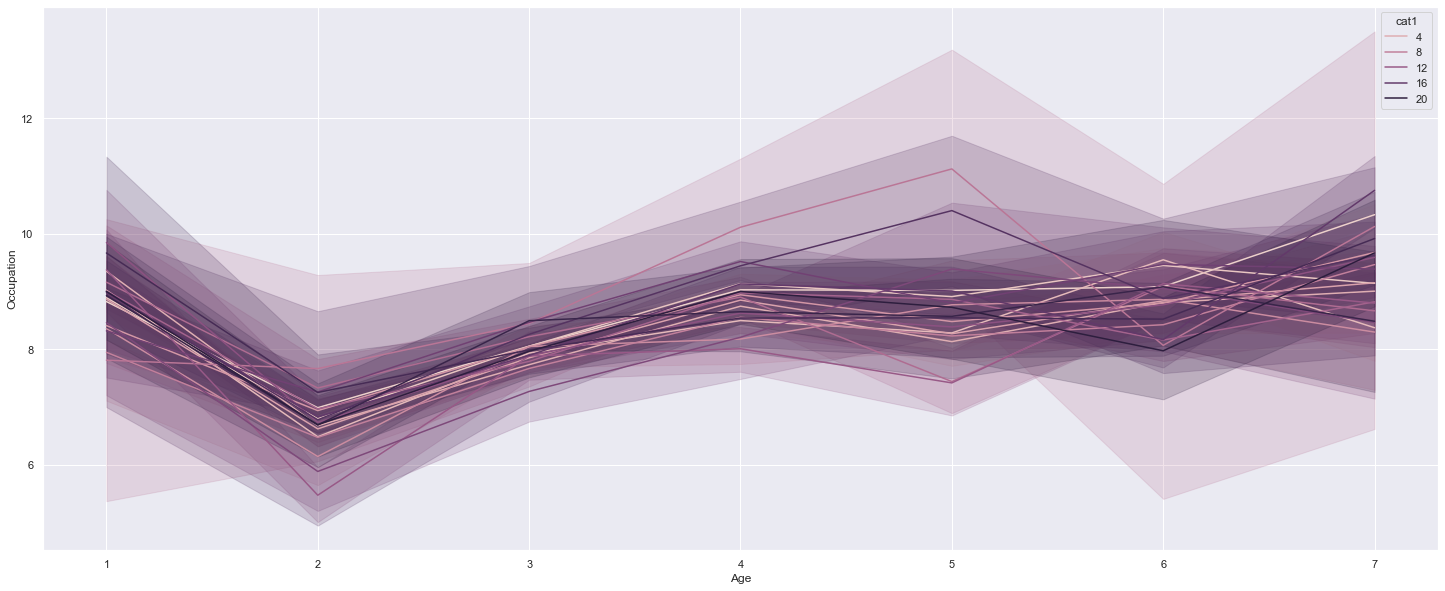

In [81]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.lineplot(x='Age',y='Occupation',data=df_i,hue = 'cat1')
plt.show()

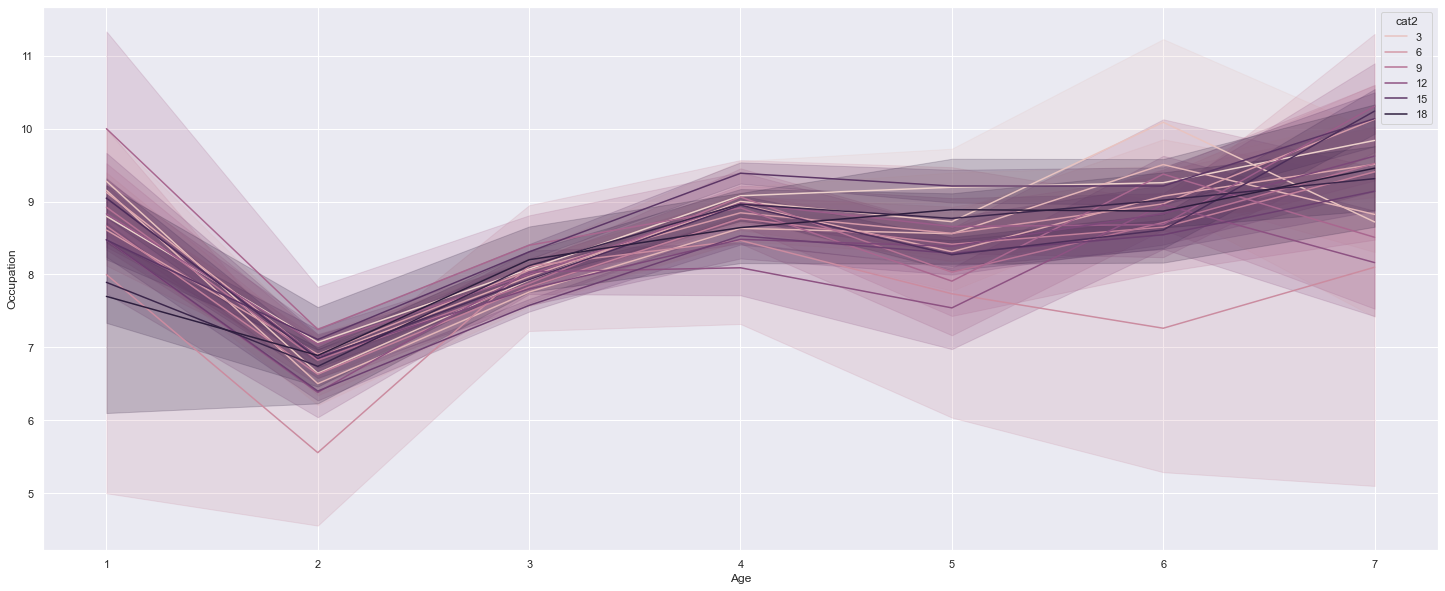

In [82]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.lineplot(x='Age',y='Occupation',data=df_i,hue = 'cat2')
plt.show()

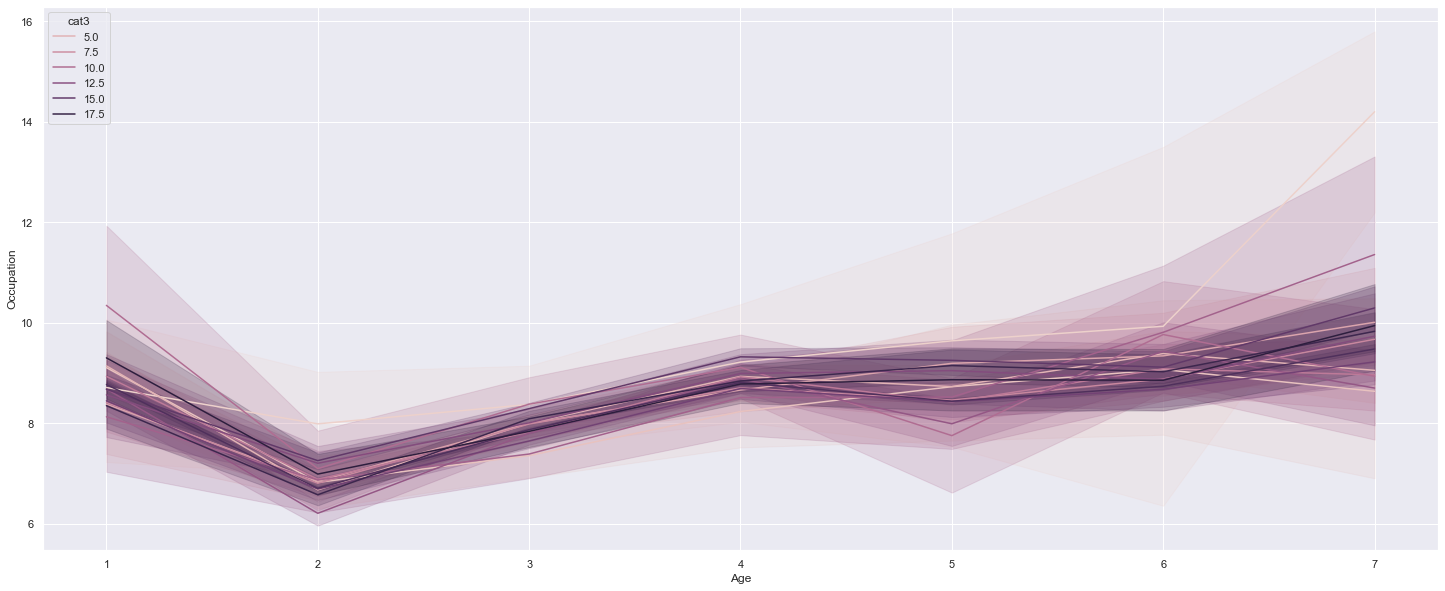

In [83]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.lineplot(x='Age',y='Occupation',data=df_i,hue = 'cat3')
plt.show()

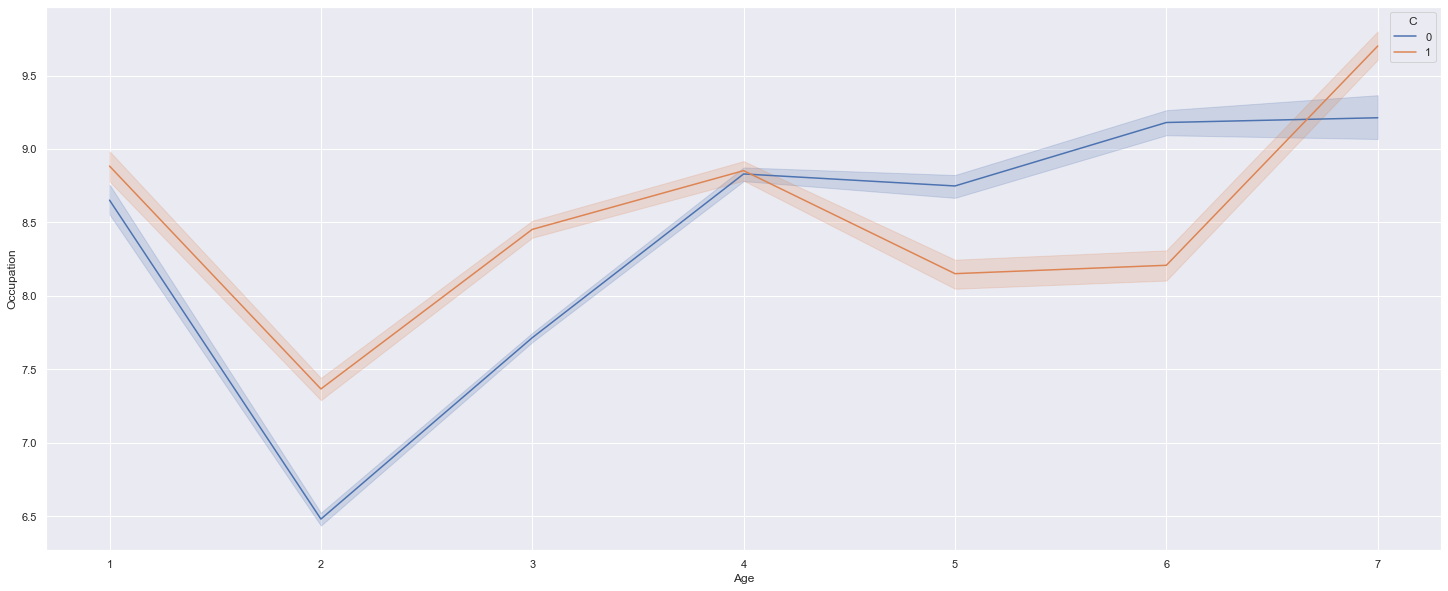

In [84]:
sns.set(rc ={'figure.figsize':(25,10)})
sns.lineplot(x='Age',y='Occupation',data=df_i,hue = 'C')
plt.show()

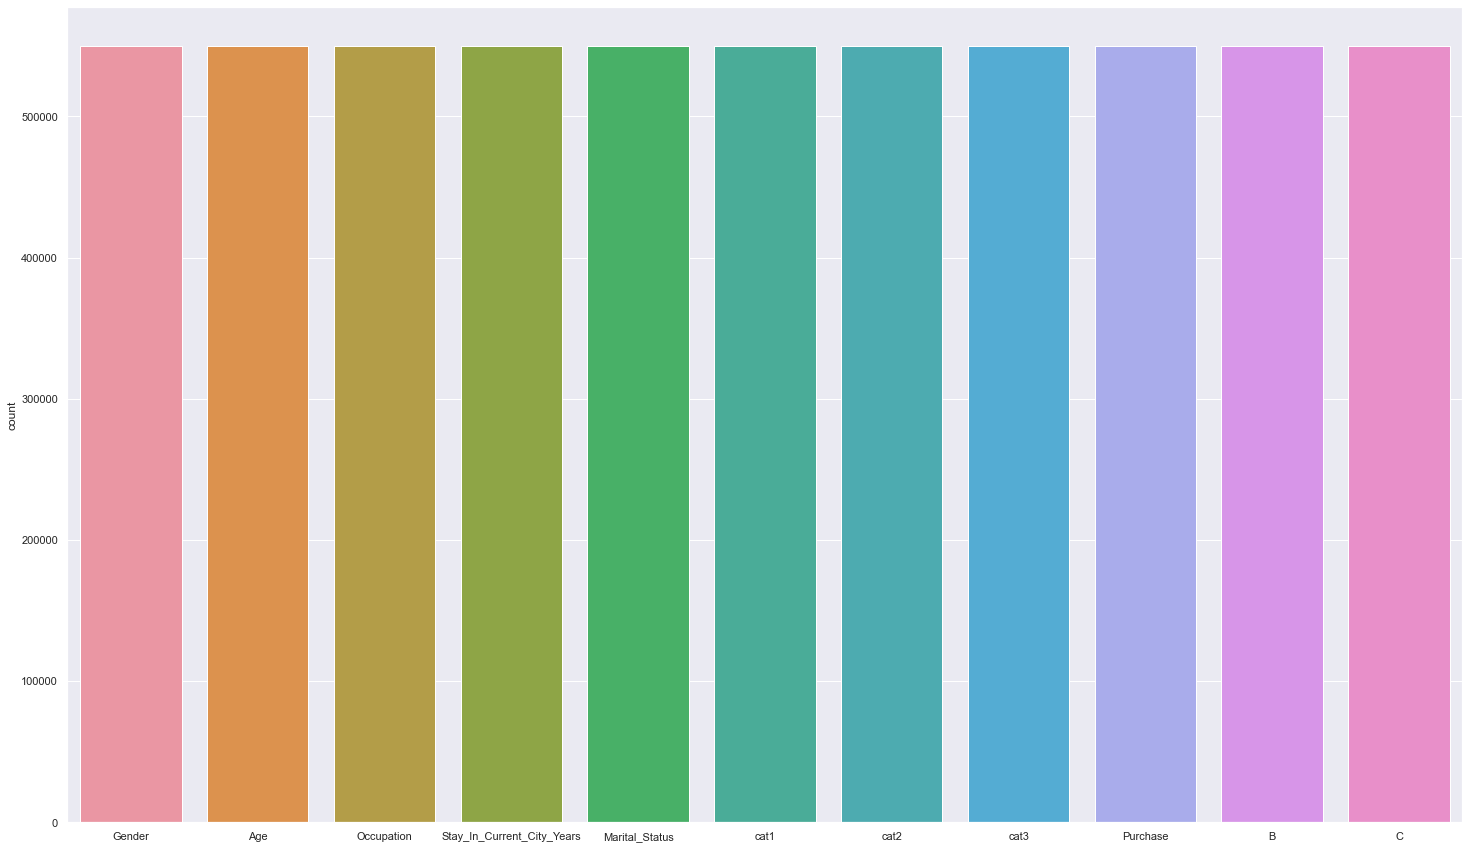

In [85]:
sns.set(rc ={'figure.figsize':(25,15)})
sns.countplot(data=df_i)
plt.show()

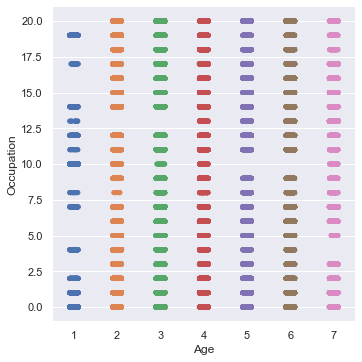

In [86]:
sns.set(rc ={'figure.figsize':(25,15)})
sns.catplot(x='Age',y='Occupation',data=df_i)
plt.show()

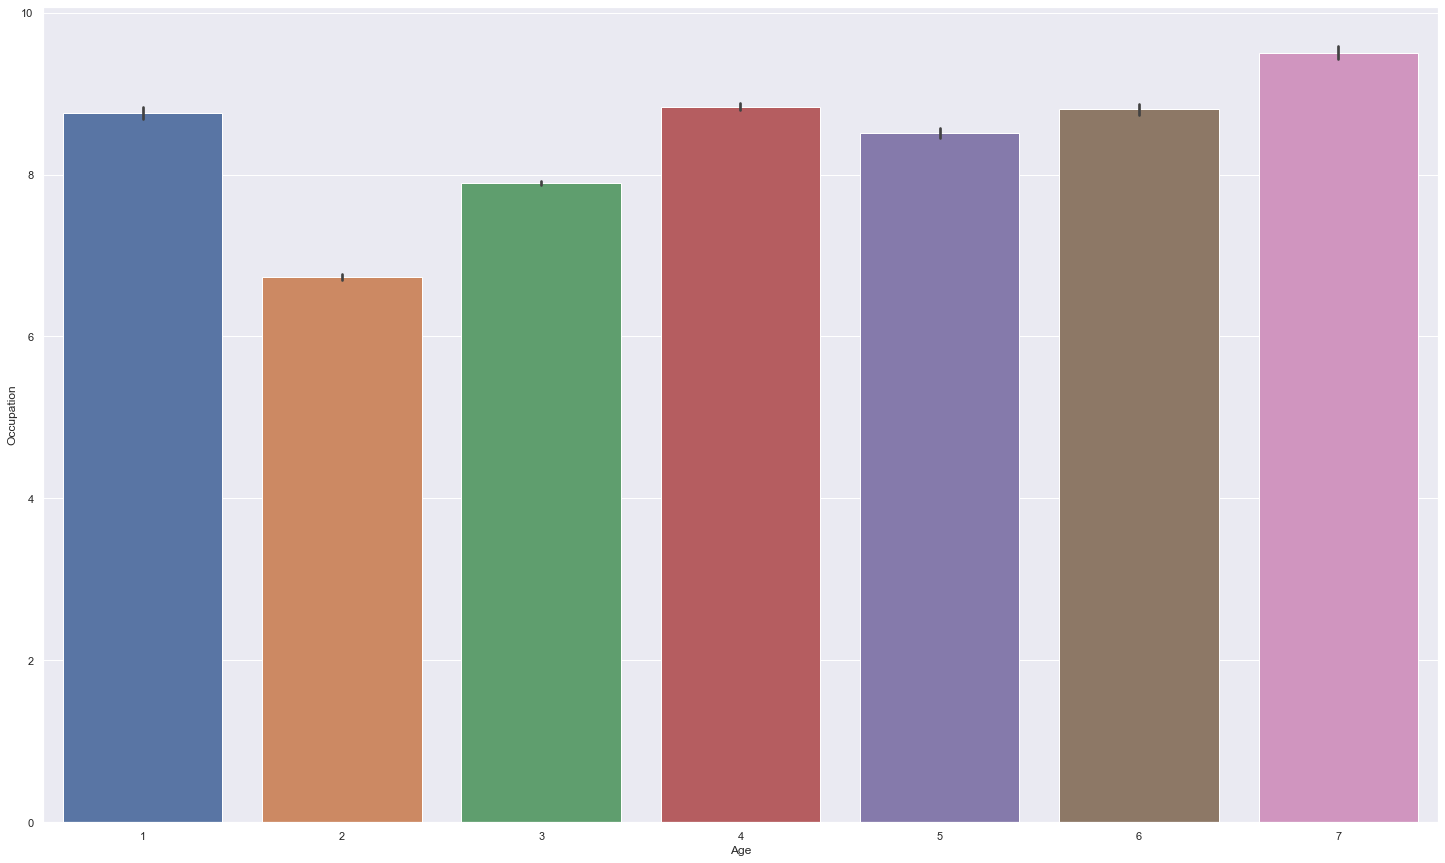

In [87]:
sns.set(rc ={'figure.figsize':(25,15)})
sns.barplot(x='Age',y='Occupation',data=df_i)
plt.show()

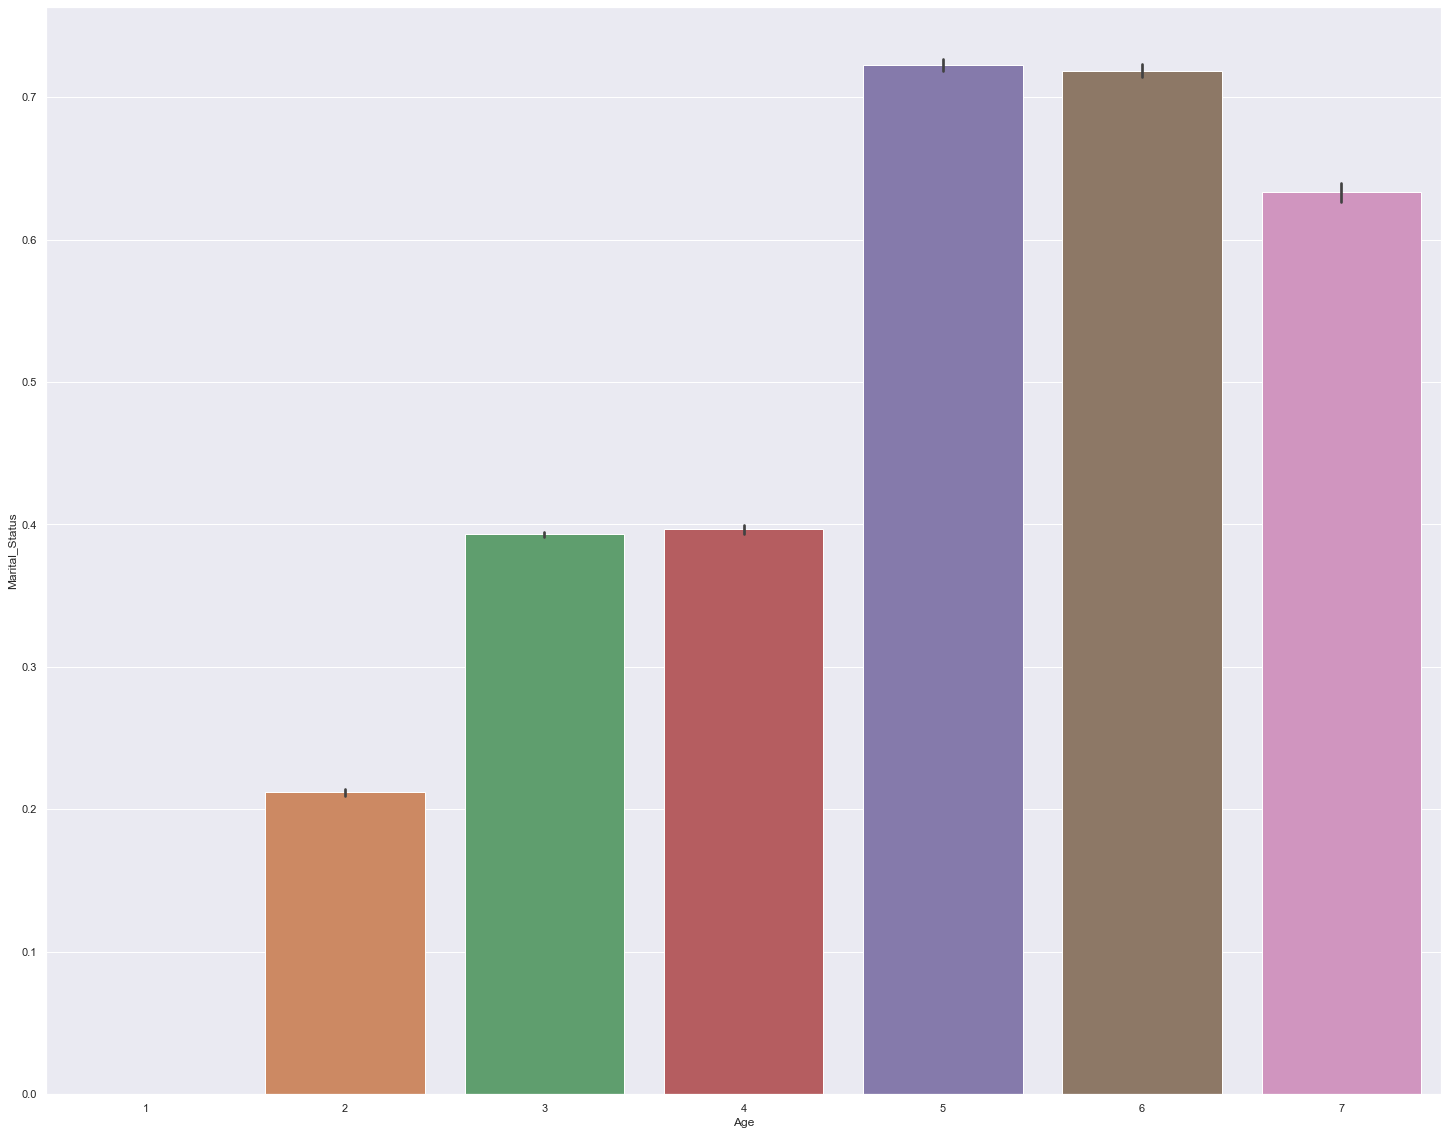

In [88]:
sns.set(rc ={'figure.figsize':(25,20)})
sns.barplot(x='Age',y='Marital_Status',data=df_i)
plt.show()

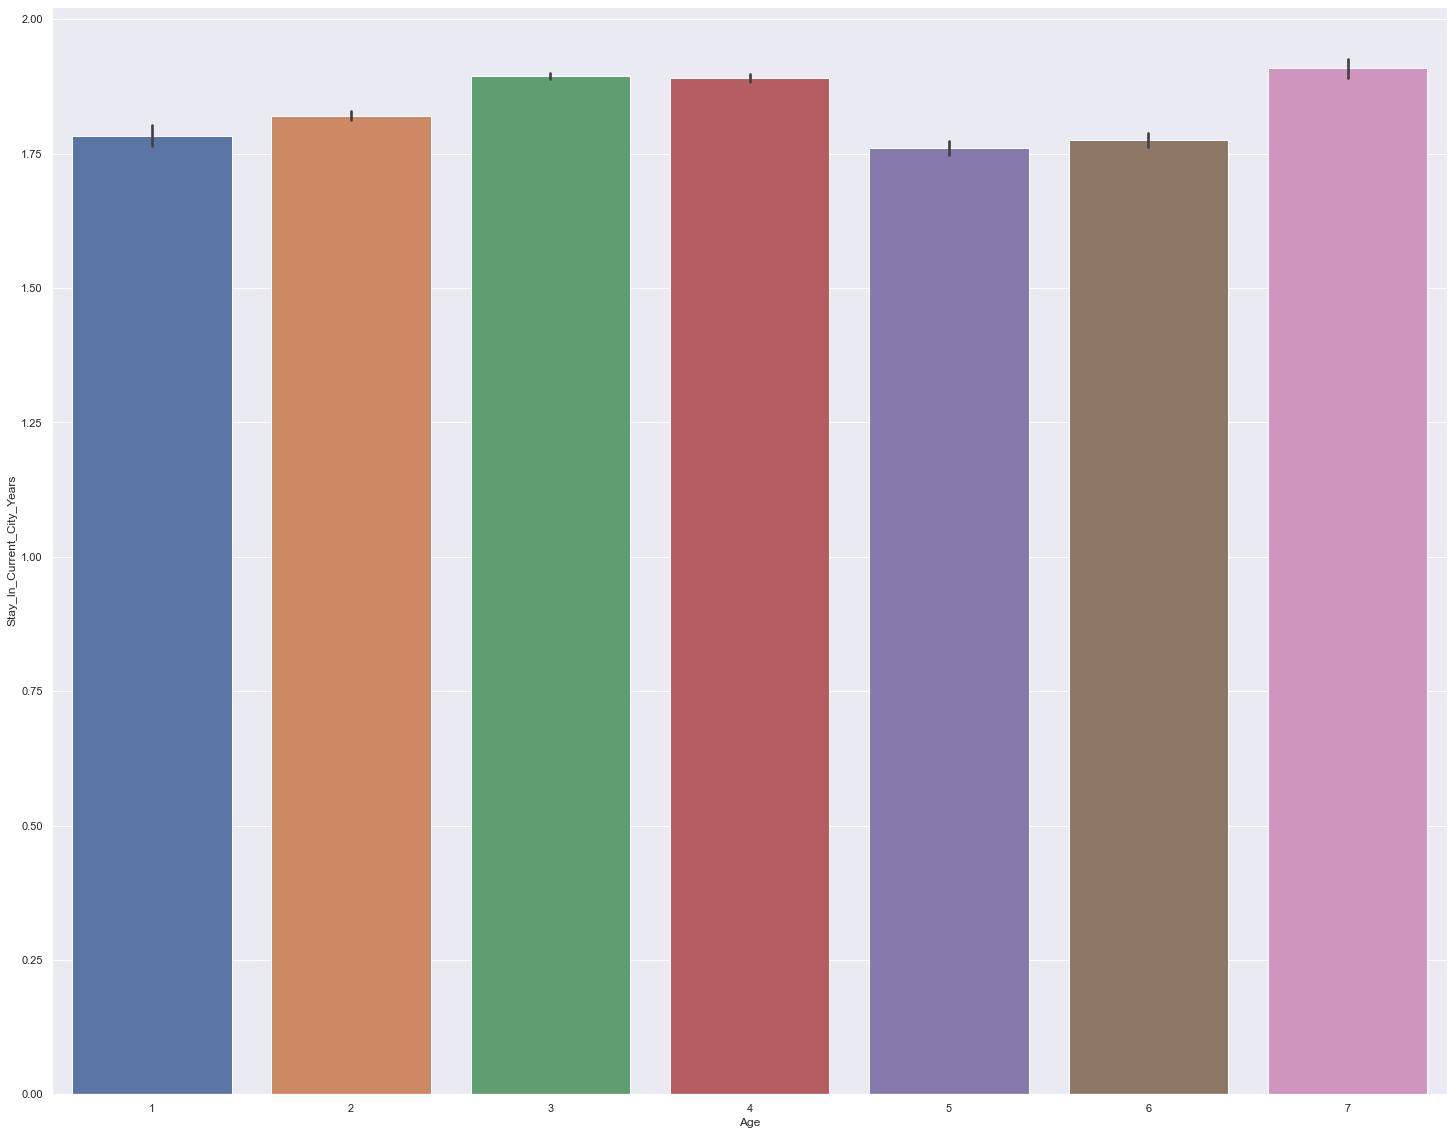

In [89]:
sns.set(rc ={'figure.figsize':(25,20)})
sns.barplot(x='Age',y='Stay_In_Current_City_Years',data=df_i)
plt.show()

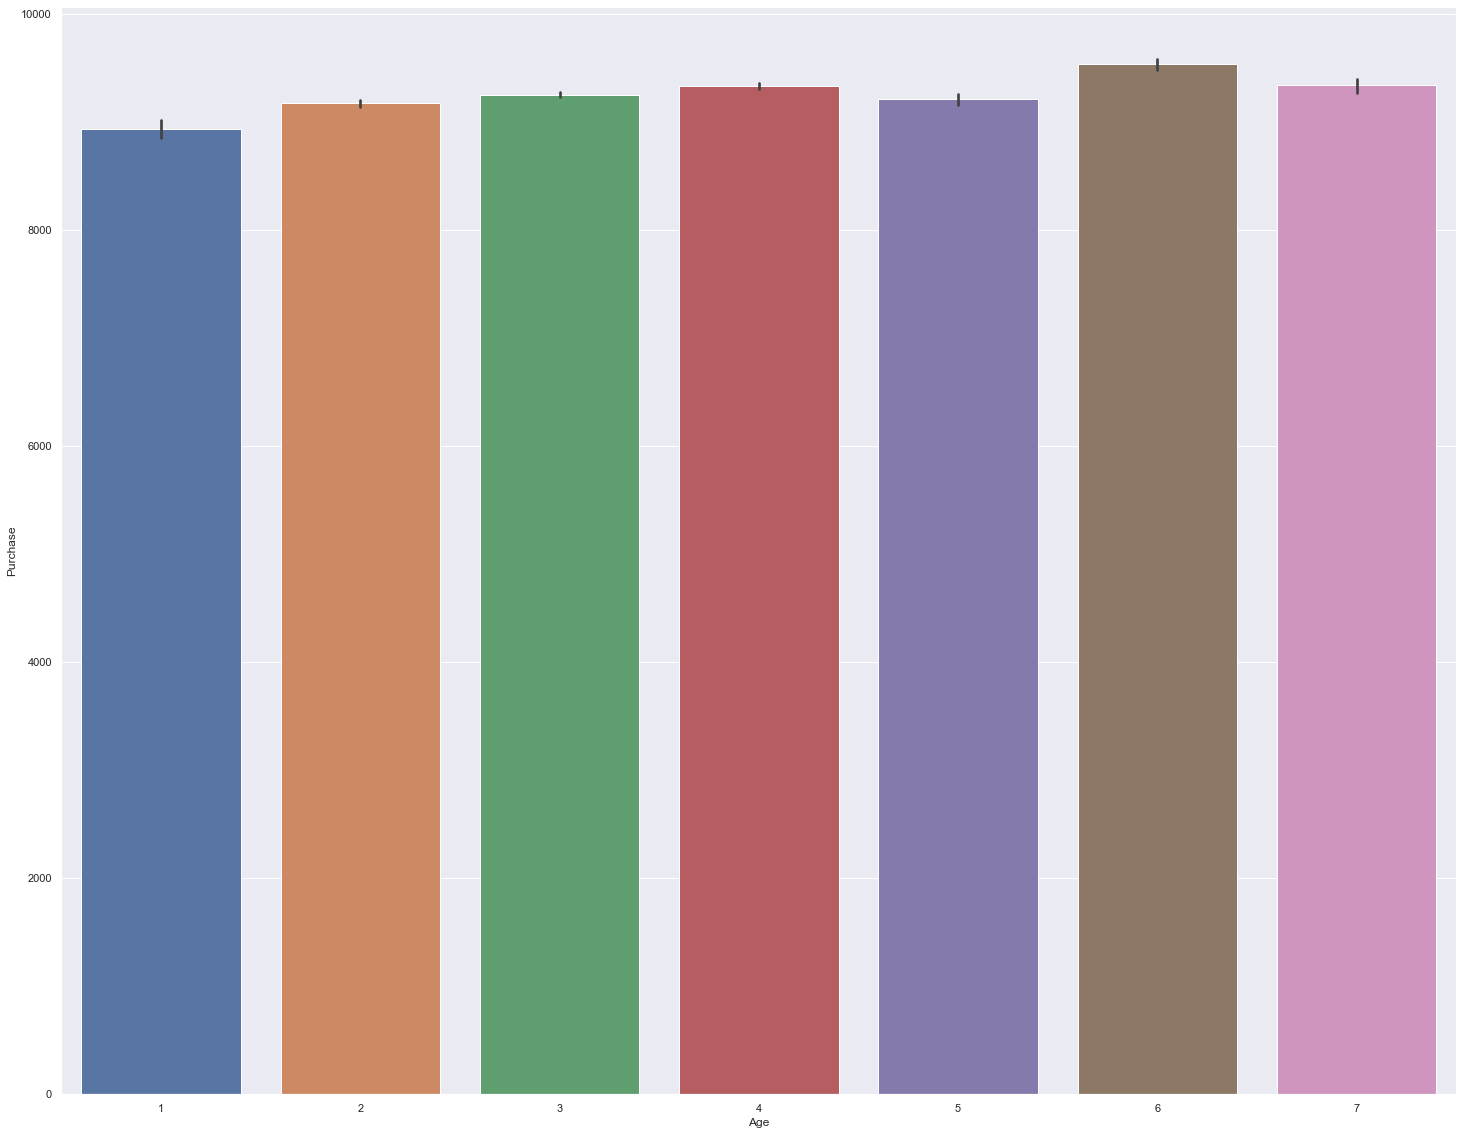

In [90]:
sns.set(rc ={'figure.figsize':(25,20)})
sns.barplot(x='Age',y='Purchase',data=df_i)
plt.show()

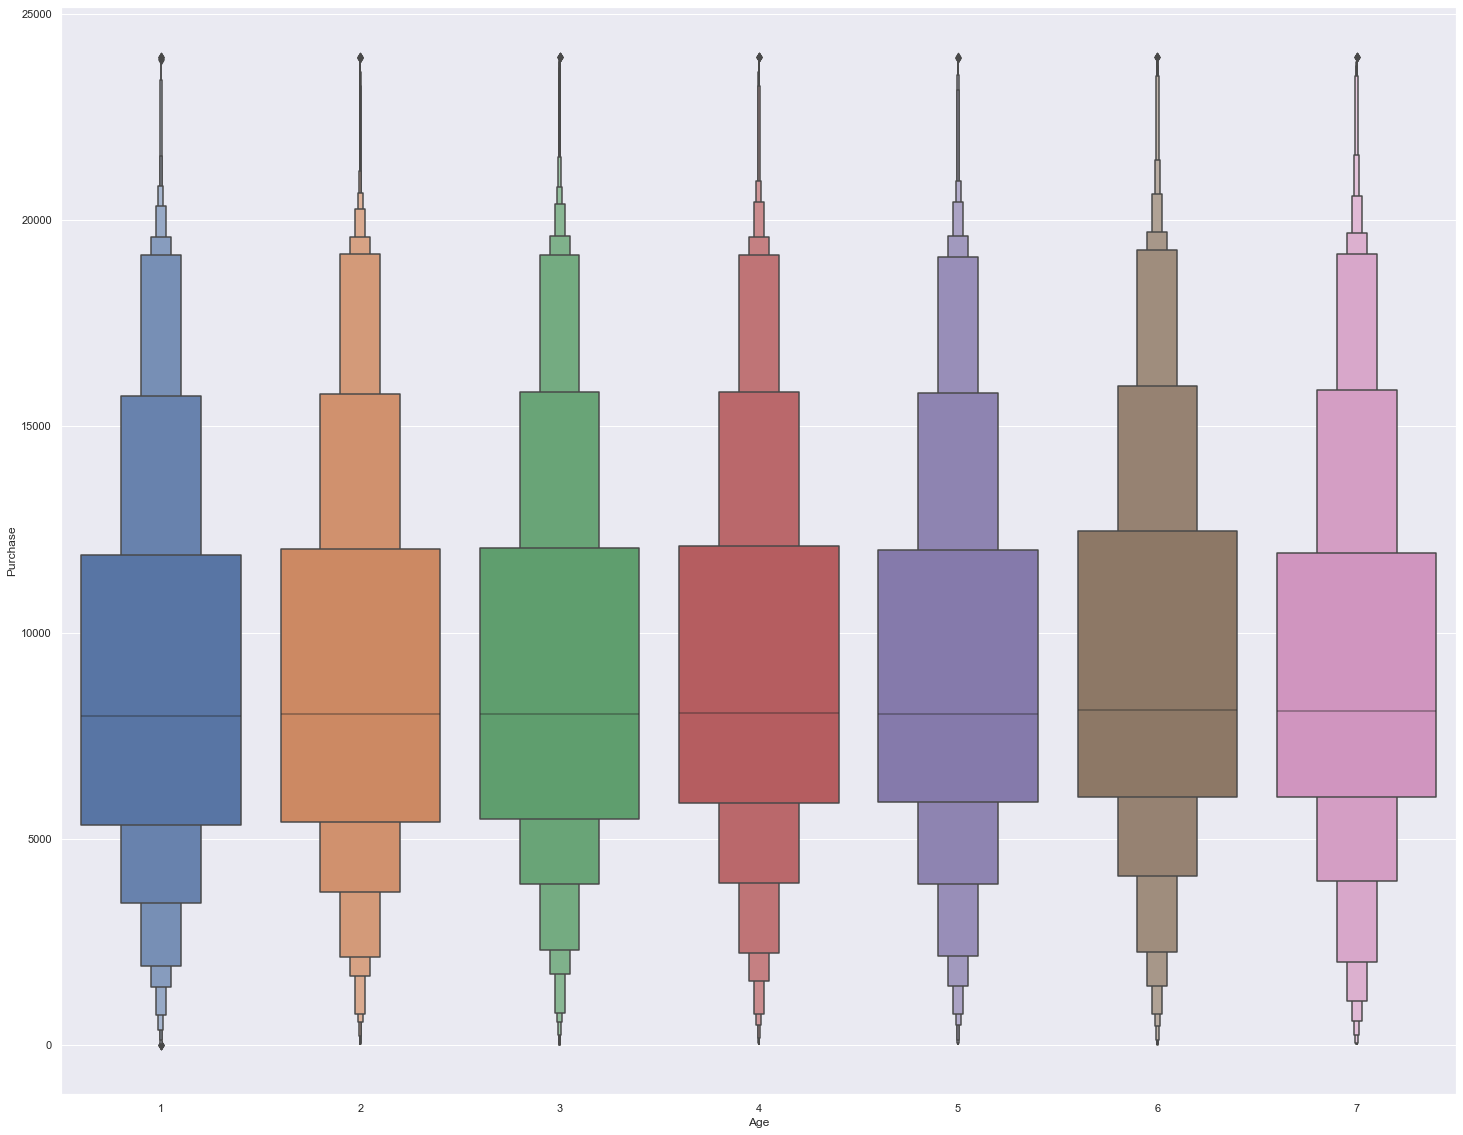

In [91]:
sns.set(rc ={'figure.figsize':(25,20)})
sns.boxenplot(x='Age',y='Purchase',data=df_i,hue_order='Marital_Status')
plt.show()

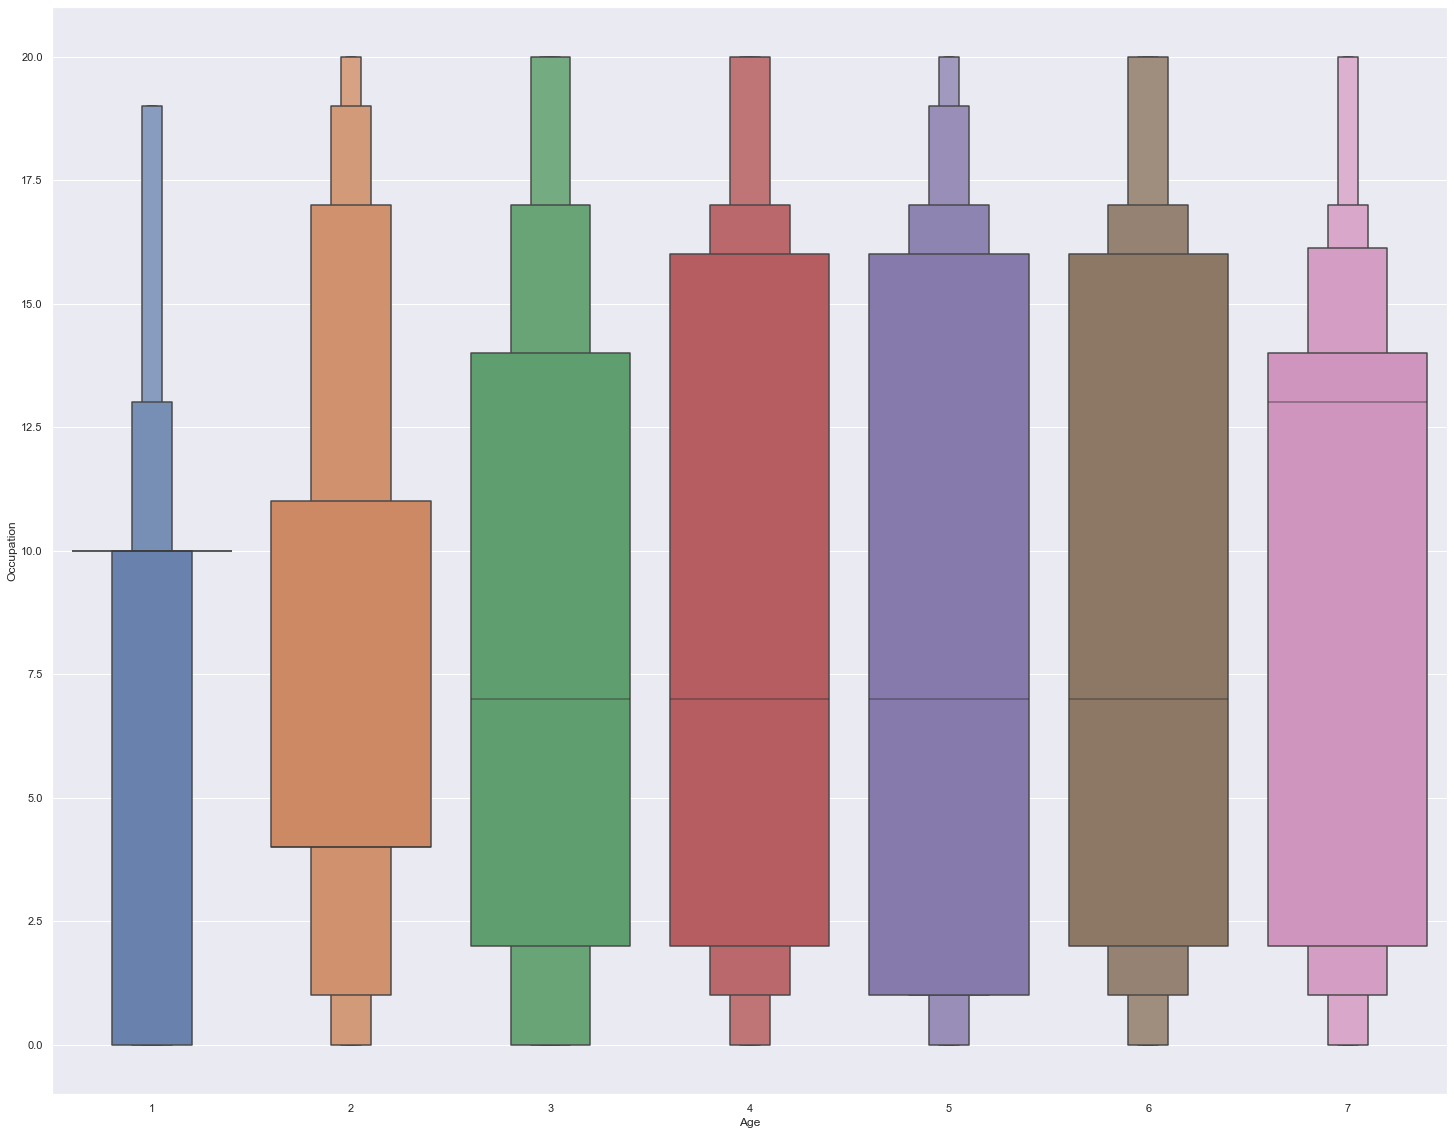

In [92]:
sns.set(rc ={'figure.figsize':(25,20)})
sns.boxenplot(x='Age',y='Occupation',data=df_i,hue_order='Marital_Status')
plt.show()

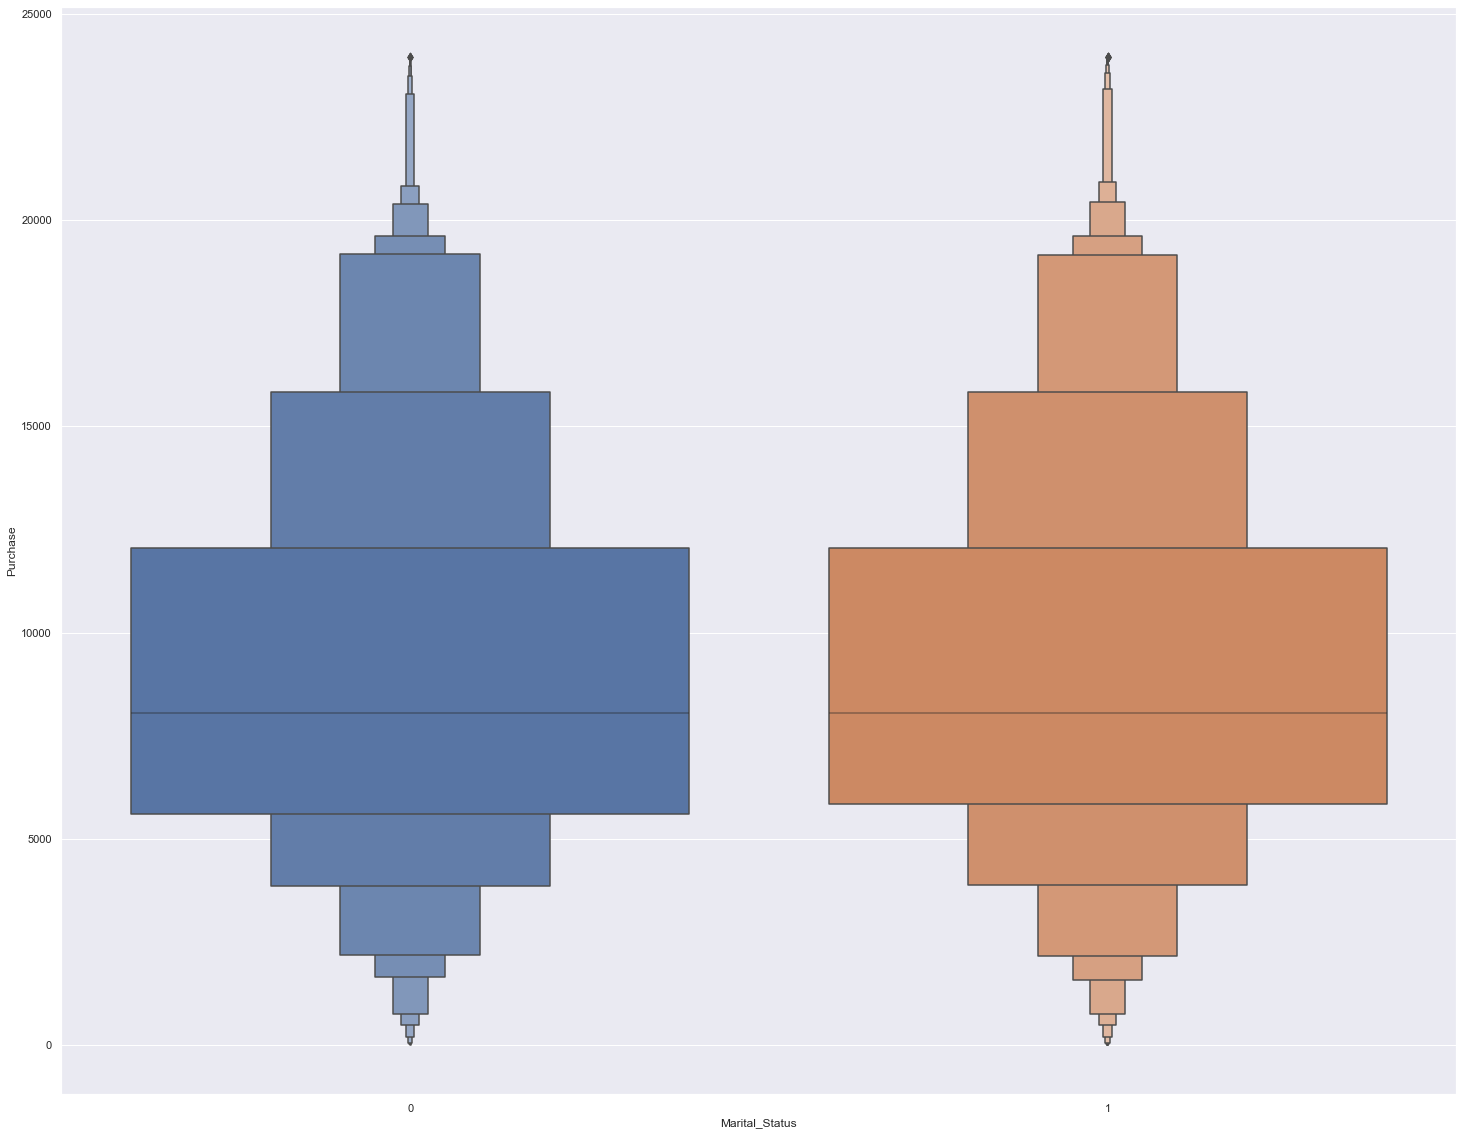

In [93]:
sns.set(rc ={'figure.figsize':(25,20)})
sns.boxenplot(x='Marital_Status',y='Purchase',data=df_i,hue_order='Marital_Status')
plt.show()

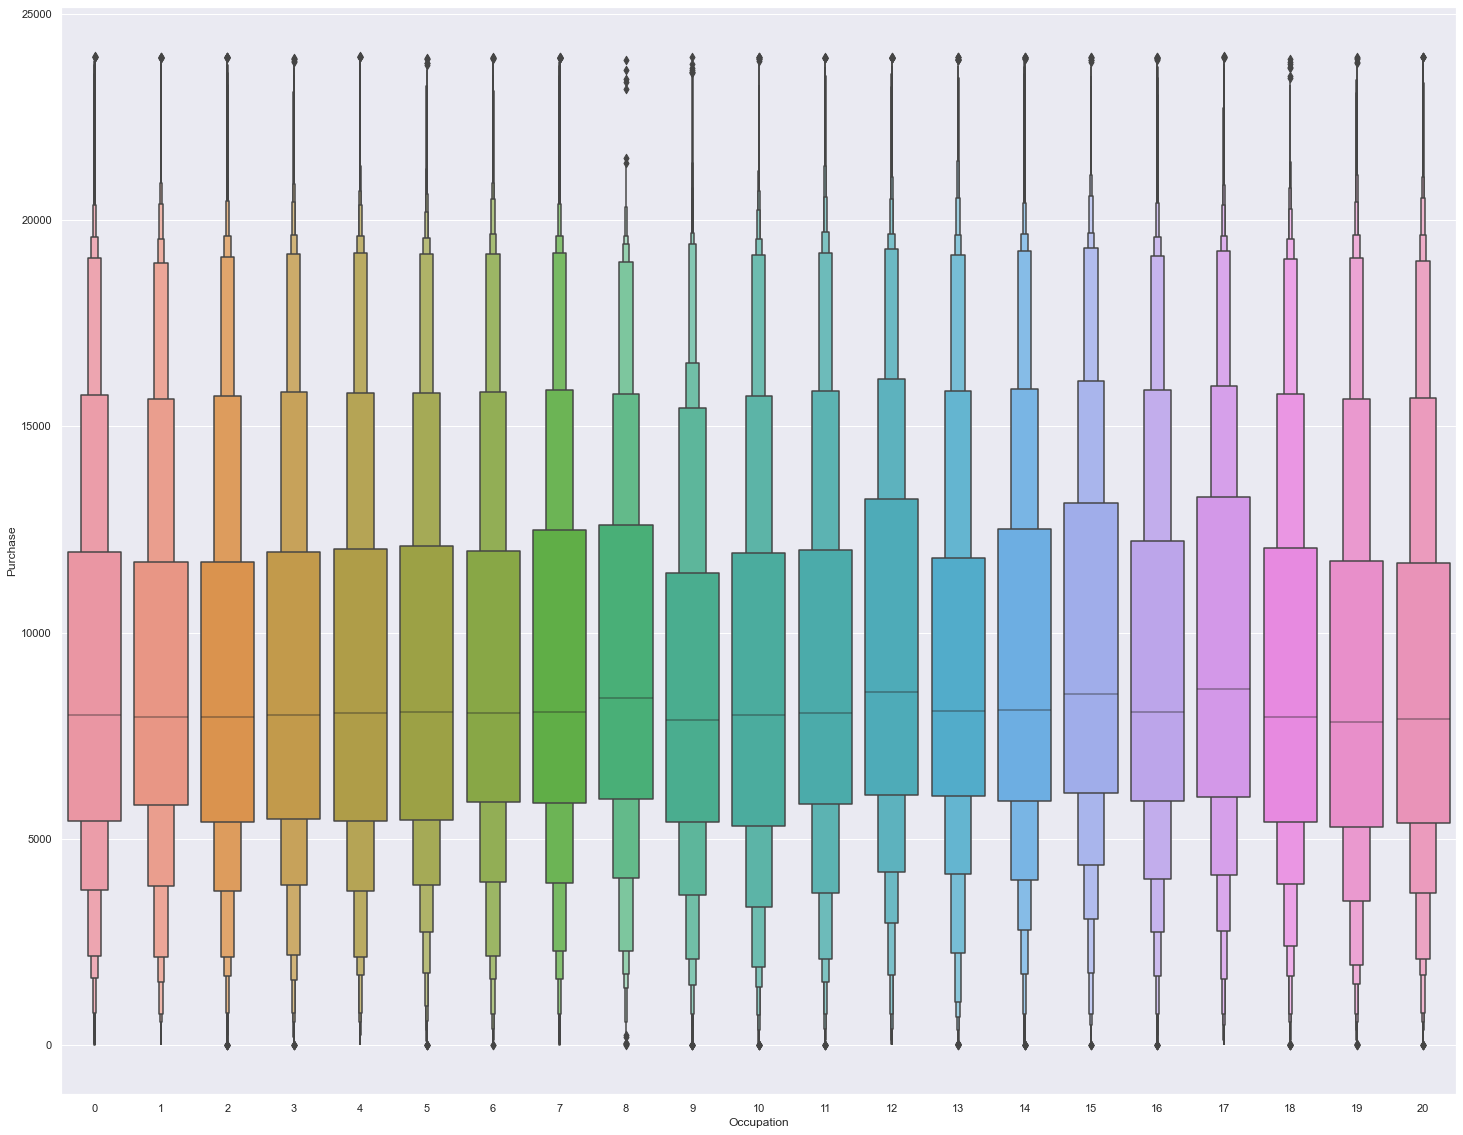

In [94]:
sns.set(rc ={'figure.figsize':(25,20)})
sns.boxenplot(x='Occupation',y='Purchase',data=df_i,hue_order='Marital_Status')
plt.show()

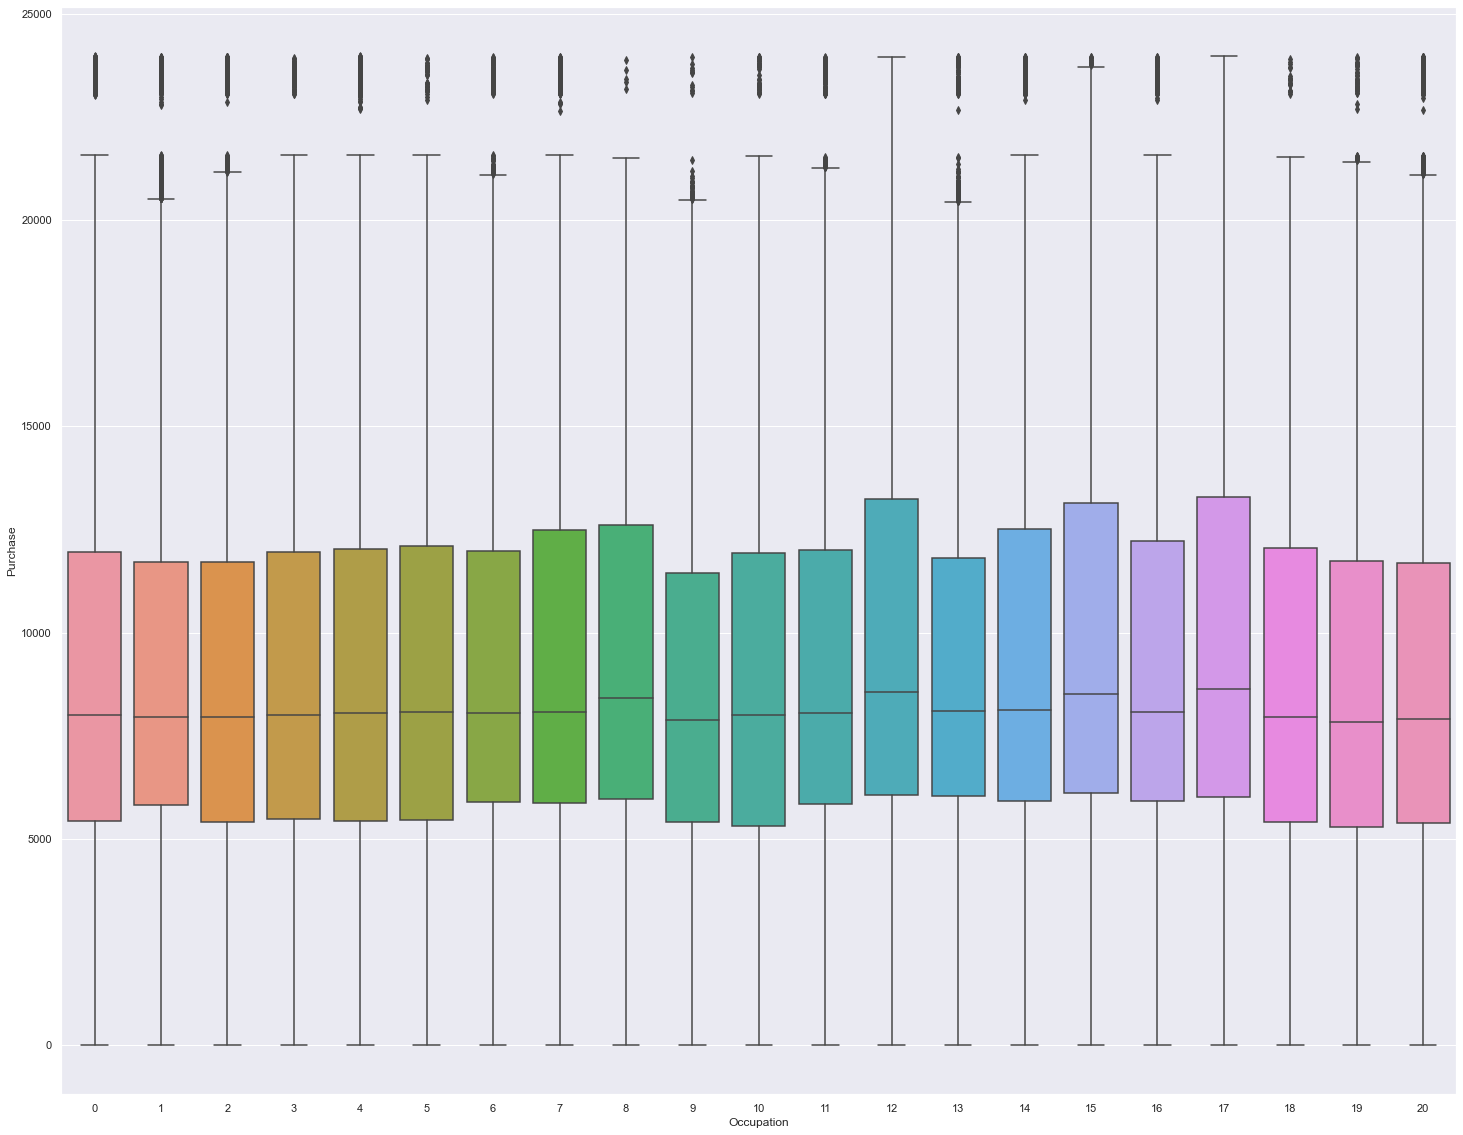

In [95]:
sns.set(rc ={'figure.figsize':(25,20)})
sns.boxplot(x='Occupation',y='Purchase',data=df_i,hue_order='Marital_Status')
plt.show()

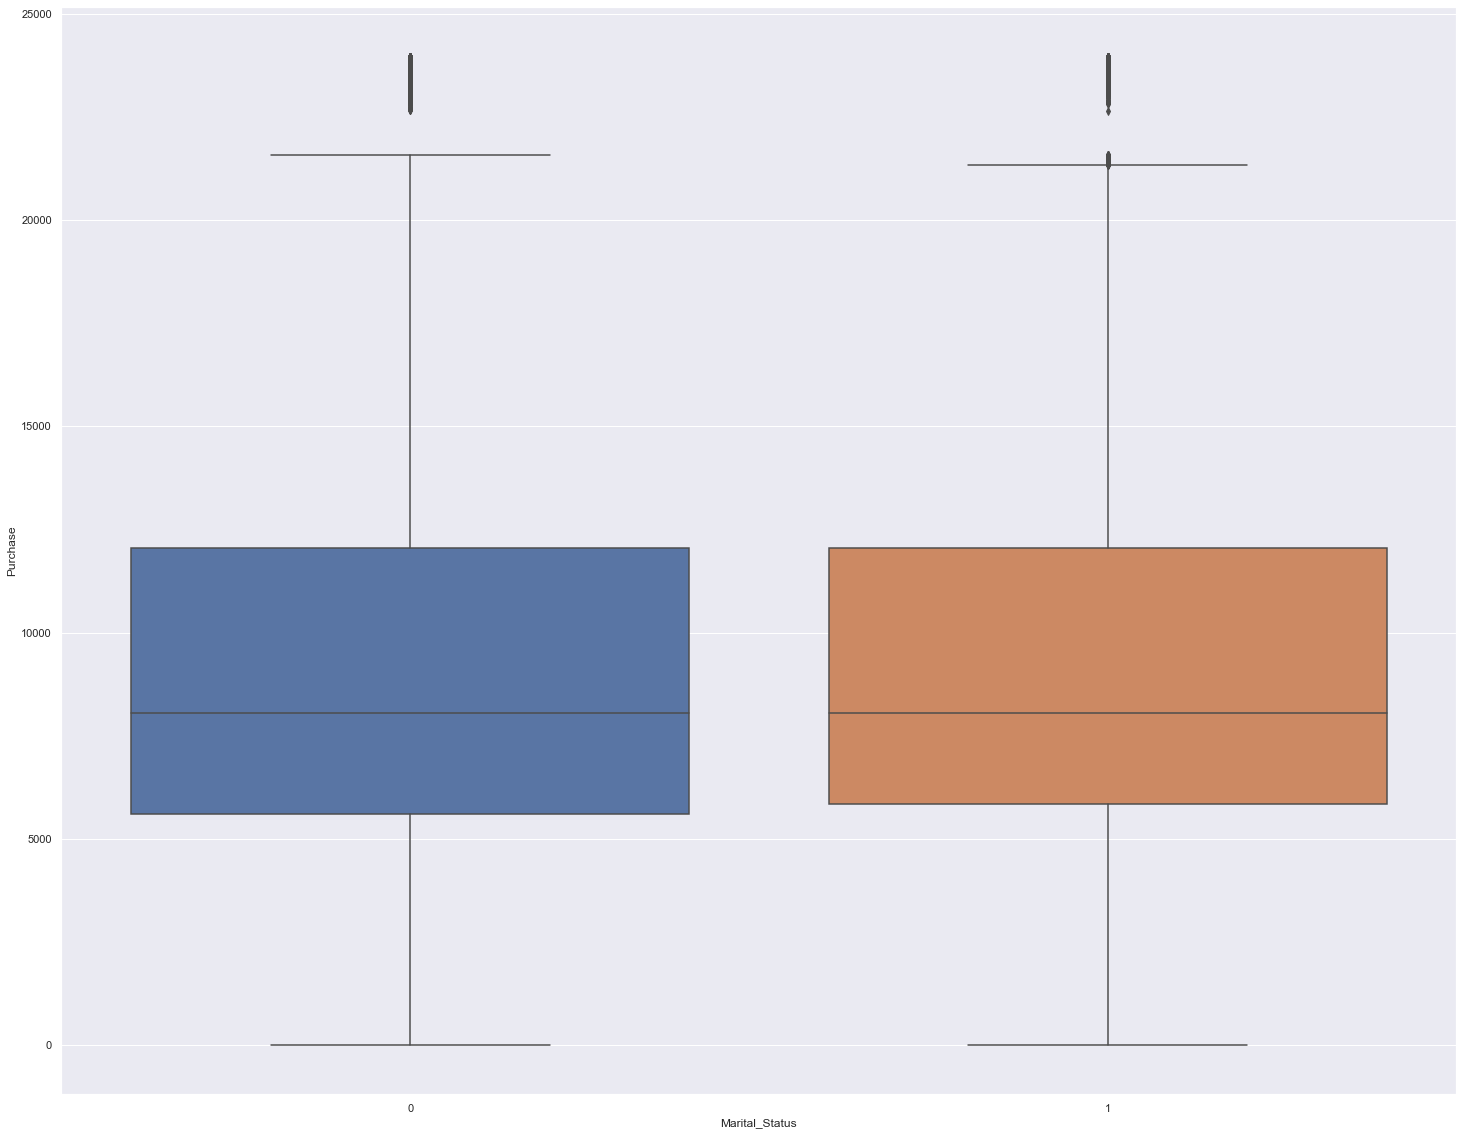

In [96]:
sns.set(rc ={'figure.figsize':(25,20)})
sns.boxplot(x='Marital_Status',y='Purchase',data=df_i,hue_order='Marital_Status')
plt.show()

In [100]:
df_i.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'cat1', 'cat2', 'cat3', 'Purchase', 'B', 'C'],
      dtype='object')

In [101]:
df_i.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

# Model Selection

In [102]:
df_i

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,368,1,0
550064,0,3,1,3,0,20,8.0,16.0,371,0,1
550065,0,3,15,4,1,20,8.0,16.0,137,1,0
550066,0,7,1,2,0,20,8.0,16.0,365,0,1


In [105]:
df_i = pd.read_csv('df_1')

In [106]:
df_i

,Unnamed: 0,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,4,1,7,16,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,550063,1,6,13,1,1,20,8.0,16.0,368,1,0
550064,550064,0,3,1,3,0,20,8.0,16.0,371,0,1
550065,550065,0,3,15,4,1,20,8.0,16.0,137,1,0
550066,550066,0,7,1,2,0,20,8.0,16.0,365,0,1


In [107]:
y=df_i['Purchase']
x=df_i.drop(columns=['Purchase','Unnamed: 0'])

In [108]:
x

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,1,0
550064,0,3,1,3,0,20,8.0,16.0,0,1
550065,0,3,15,4,1,20,8.0,16.0,1,0
550066,0,7,1,2,0,20,8.0,16.0,0,1


In [109]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

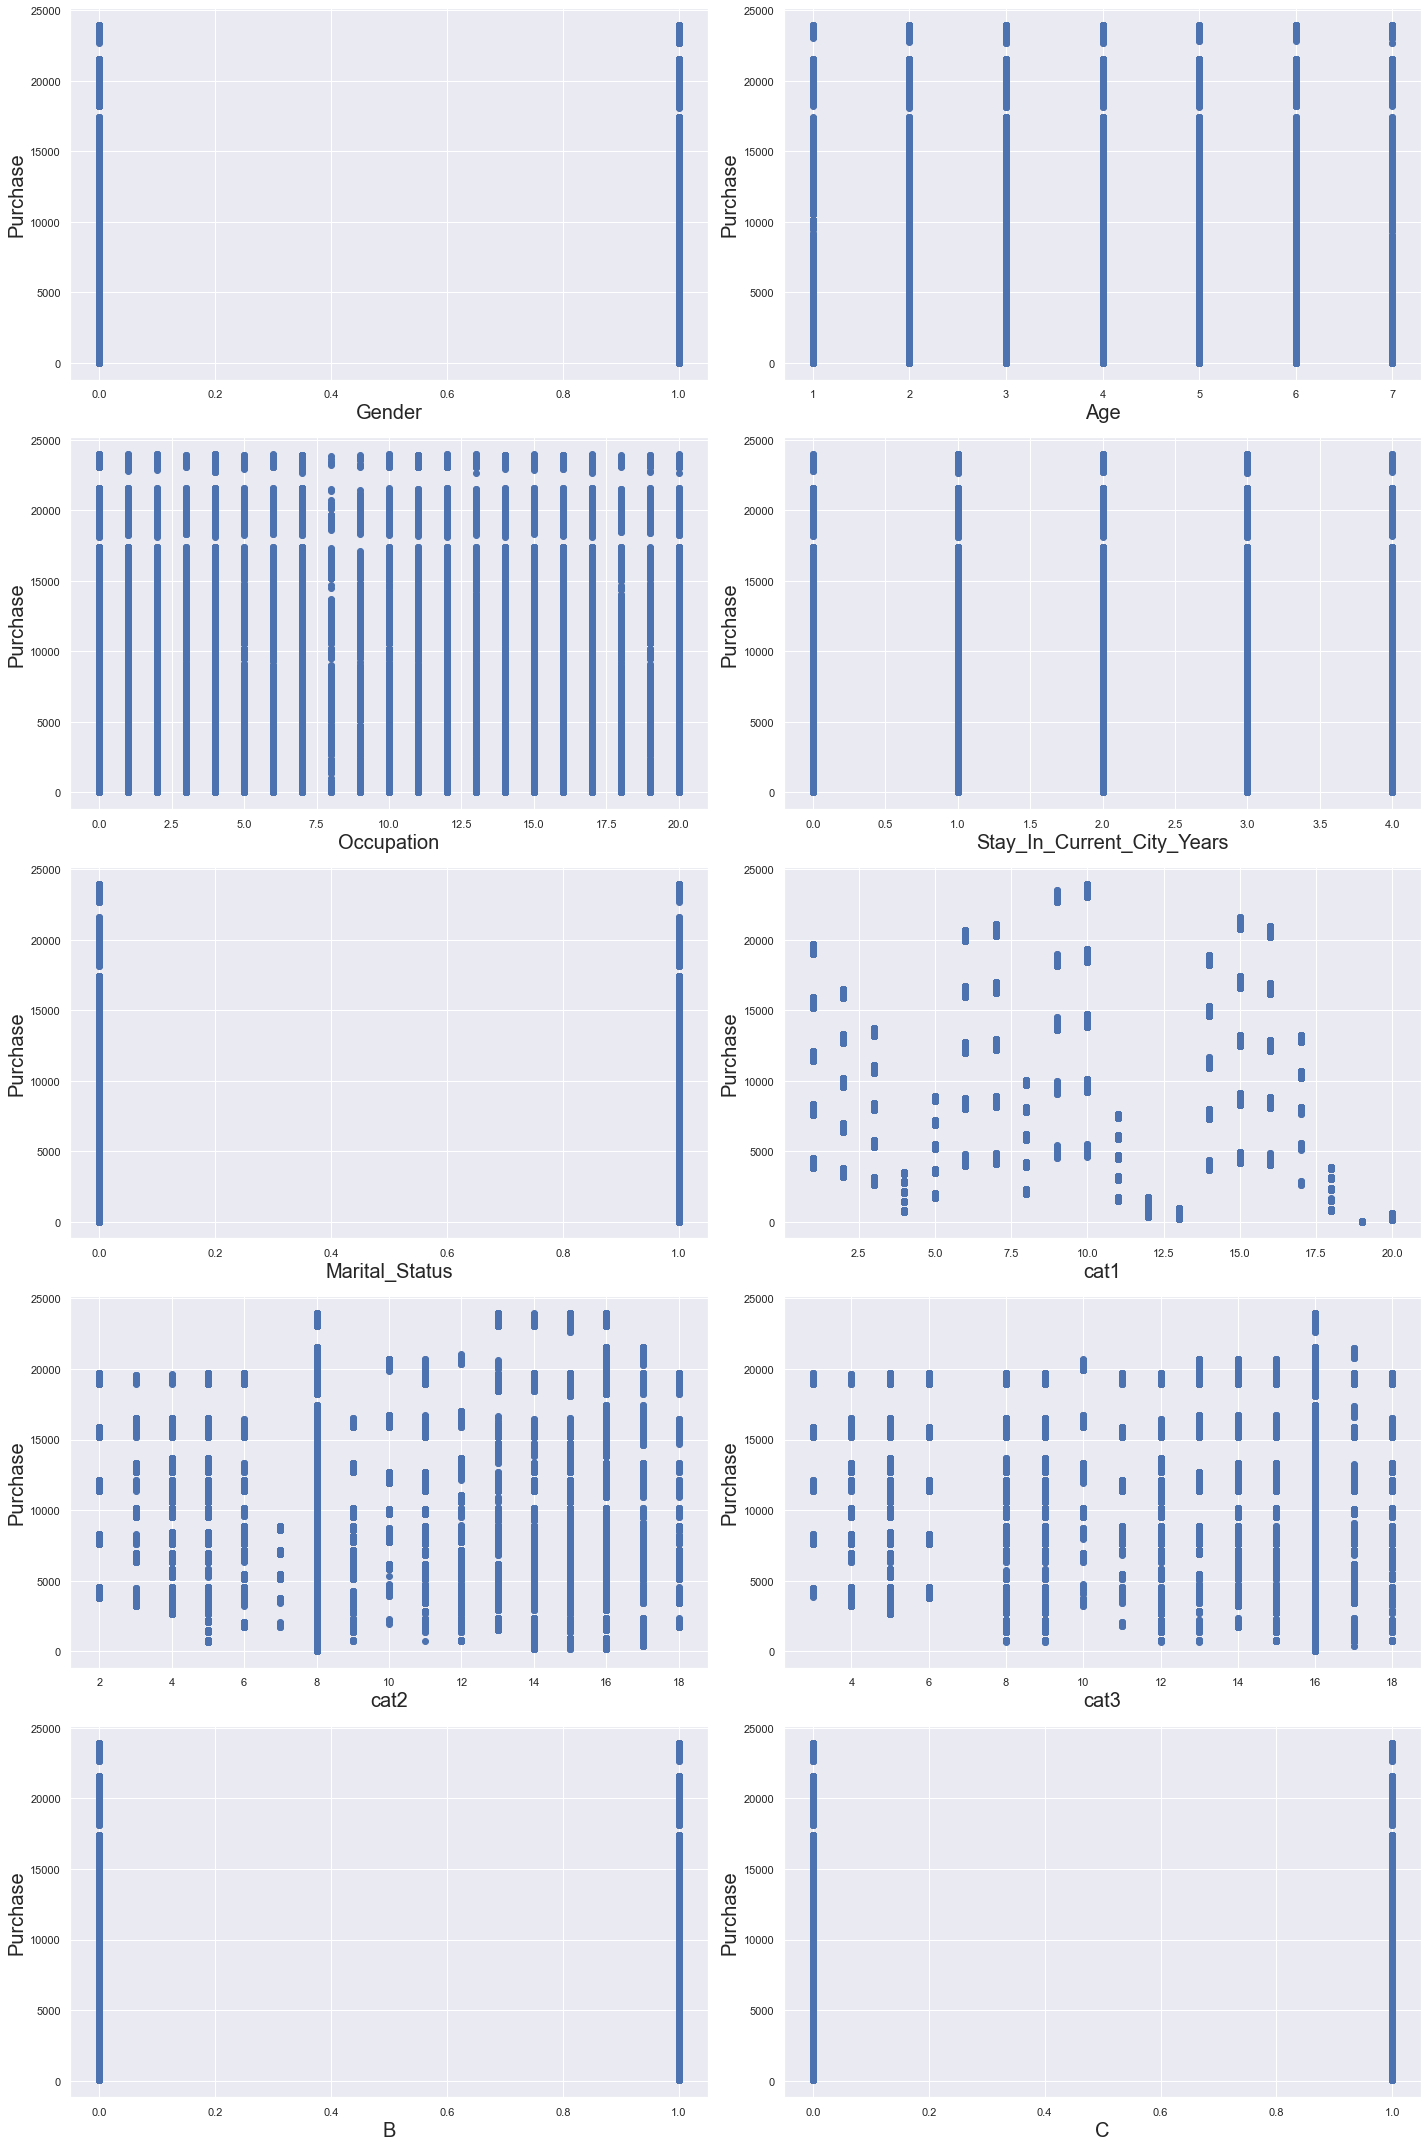

In [110]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for col in x:
    if plotnumber <=10:
        ax=plt.subplot(5,2,plotnumber)
        plt.scatter(x[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Purchase',fontsize=20)
    plotnumber+=1
plt.tight_layout()


# VIF Testing our Dataset

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

In [113]:
x_scaled = scaler.fit_transform(x)

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
variables = x_scaled
vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['Features'] = x.columns

In [116]:
vif

,VIF,Features
0,1.016585,Gender
1,1.136353,Age
2,1.024295,Occupation
3,1.001782,Stay_In_Current_City_Years
4,1.107985,Marital_Status
5,1.145986,cat1
6,1.305950,cat2
7,1.339914,cat3
8,1.492945,B
9,1.512635,C


# Let's split our data in Train and Test

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.15)

In [119]:
y_train

466119    10026
49242     16282
354390     8034
505407    12532
525698    19378
          ...  
155372     8755
519596    10964
468076     4265
221132     5848
220183     3231
Name: Purchase, Length: 467557, dtype: int64

# Algorithms - 1

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
regression = LinearRegression(normalize=True,n_jobs=-1)
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [122]:
regression.coef_

array([  220.34898913,   164.8721036 ,    45.05328822,     8.07077643,
         -29.54926436, -1583.05207683,   -11.84818244,  -424.37172026,
          79.11917828,   309.12905364])

In [123]:
regression.intercept_

9263.400976080728

# Accuracy of Model

In [124]:
regression.score(x_train,y_train)

0.1310900857680416

In [125]:
regression.score(x_test,y_test)

0.1321451675582933

### Let's create a Function to Create Adjusted R-Squared

In [126]:

def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [127]:
adj_r2(x_train,y_train)

0.131071501288349

In [128]:
adj_r2(x_test,y_test)

0.13203997303314885

# Algorithms - 2

In [129]:
from sklearn.tree import DecisionTreeRegressor

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=45)

In [131]:
dtc = DecisionTreeRegressor(random_state=5)

In [132]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor(random_state=5)

In [133]:
y_predic = dtc.predict(x_test)

In [134]:
y_predic

array([ 4051.55555556,  6198.        ,  7867.11111111, ...,
       20089.        , 11324.89189189,  6290.61904762])

In [135]:
dtc.score(x_train,y_train)

0.7955040842394787

In [136]:
dtc.score(x_test,y_test)

0.5665777117216194

In [137]:
def adj_r2(x,y):
    r2 = dtc.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [138]:
adj_r2(x_train,y_train)

0.7954987731538722

In [139]:
adj_r2(x_test,y_test)

0.5665514452960526

## Some Advance Esemble technique used to Increase accuracy of Model

## 1. Implementation of Bagging

In [140]:
from sklearn.neighbors import KNeighborsRegressor

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30)

In [142]:
knn = KNeighborsRegressor(n_neighbors = 4)

In [143]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [144]:
knn.score(x_train,y_train)

0.6602265617846843

In [145]:
knn.score(x_test,y_test)

0.5072837867608153

In [146]:
def adj_r2(x,y):
    r2 = knn.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [147]:
adj_r2(x_train,y_train)

0.660217737325719

In [148]:
adj_r2(x_test,y_test)

0.5072539269818177

## Let's using Bagging over KNN Regression and see if our score is improves

In [149]:
from sklearn.ensemble import BaggingRegressor

In [150]:
bag_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors=5),n_estimators=10,max_samples = 0.5,bootstrap=True,random_state=3,oob_score=True)

In [151]:
bag_knn.fit(x_train,y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(), max_samples=0.5,
                 oob_score=True, random_state=3)

In [152]:
bag_knn.score(x_train,y_train) 1

0.5949376446461752

In [153]:
bag_knn.score(x_test,y_test)

0.5074472110642698

In [154]:
def adj_r2(x,y):
    r2 = bag_knn.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [155]:
adj_r2(x_train,y_train)

0.5949271245297353

In [156]:
adj_r2(x_test,y_test)

0.5074173611891752

# Algorithms - 3

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.40)

In [159]:
dtc = RandomForestRegressor(n_estimators=700,random_state=356)

In [160]:
dtc.fit(x_train,y_train)

RandomForestRegressor(n_estimators=700, random_state=356)

In [161]:
y_predic = dtc.predict(x_test)

In [162]:
y_predic

array([ 6211.88370626, 13886.92523279, 10769.80784354, ...,
        6788.5286992 , 16649.74694218,  7799.04660679])

In [163]:
dtc.score(x_train,y_train)

0.7925776559859825

In [164]:
dtc.score(x_test,y_test)

0.6290004092987753

In [165]:
def adj_r2(x,y):
    r2 = dtc.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [166]:
adj_r2(x_train,y_train)

0.7925713710127221

In [167]:
adj_r2(x_test,y_test)

0.6289835469840133